In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

Loaded  2 encoders.


In [3]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

In [4]:
csv = pd.read_csv("SPLUSiDR4_GaiaEDR3_BJ21_LAMOSTDR7_SEGUE.csv", encoding='latin-1', index_col=['ID', 'RA_SPLUS', 'DEC_SPLUS'])
xtrain = pd.DataFrame()
ytrain = pd.DataFrame()

In [4]:
csv

,,,u_0,J378_0,J395_0,J410_0,J430_0,g_0,J515_0,r_0,J660_0,i_0,...,feh_LAMOST_err,teff_LAMOST_recalibrated,logg_LAMOST_recalibrated,feh_LAMOST_recalibrated,teff_training,teff_training_err,logg_training,logg_training_err,feh_training,feh_training_err
ID,RA_SPLUS,DEC_SPLUS,,,,,,,,,,,,,,,,,,,,,
iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,18.740275,18.459236,18.448148,17.773576,17.745170,17.453267,17.281794,16.996103,16.979660,16.878871,...,NaN,NaN,NaN,NaN,5777,9,4.27,0.05,-0.42,0.04
iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,17.961170,17.557527,17.395885,16.940903,16.960105,16.798380,16.634018,16.553750,16.562136,16.524397,...,0.088,6695.90,3.986,-0.575,6567,18,3.82,0.06,-0.53,0.03
iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,15.610993,15.151029,14.938563,14.678464,14.614623,14.519800,14.358354,14.258020,14.280045,14.259589,...,0.058,6596.29,3.741,-0.471,6683,17,3.81,0.06,-0.35,0.02
iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,18.196770,17.862429,17.808803,17.216337,17.137261,16.869861,16.693803,16.442250,16.429073,16.330336,...,NaN,NaN,NaN,NaN,5847,46,4.08,0.04,-0.31,0.02
iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,17.882518,17.664711,17.522903,16.866583,16.798515,16.354411,16.198380,15.784910,15.729709,15.614563,...,0.051,5340.13,4.454,-0.703,5280,38,4.49,0.06,-0.84,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,19.305300,18.933995,18.973642,18.284042,18.290215,17.841979,17.704608,17.396171,17.388831,17.271604,...,0.119,5636.50,4.316,-0.692,5637,109,4.32,0.18,-0.69,0.12
iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,16.435508,16.125900,15.977774,15.279934,15.188697,14.779653,14.595130,14.282482,14.243314,14.105358,...,0.062,5591.32,4.205,-0.122,5591,59,4.21,0.09,-0.12,0.06
iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,15.140979,14.620409,14.519064,14.139961,14.072554,13.942583,13.793976,13.681078,13.694912,13.620172,...,0.040,6564.66,3.897,-0.647,6565,43,3.90,0.06,-0.65,0.04


In [5]:
print('min: ', csv['teff_training'].min())
print('max: ', csv['teff_training'].max())

min:  4001
max:  7048


In [6]:
csv['logg_training'].mean()

4.009834374302922

In [6]:
print('min: ', csv['logg_training'].min())
print('max: ', csv['logg_training'].max())

min:  0.21
max:  4.92


In [7]:
print('min: ', csv['feh_training'].min())
print('max: ', csv['feh_training'].max())

min:  -4.21
max:  0.74


In [10]:
for column in csv:
    print(column)

u_0
J378_0
J395_0
J410_0
J430_0
g_0
J515_0
r_0
J660_0
i_0
J861_0
z_0
sf11_ebv
e_u_PStotal
e_J0378_PStotal
e_J0395_PStotal
e_J0410_PStotal
e_J0430_PStotal
e_g_PStotal
e_J0515_PStotal
e_r_PStotal
e_J0660_PStotal
e_i_PStotal
e_J0861_PStotal
e_z_PStotal
s2n_DET_auto
SEX_FLAGS_DET
ra_epoch2000
dec_epoch2000
source_id
ra_GaiaEDR3
ra_GaiaEDR3_error
dec_GaiaEDR3
dec_GaiaEDR3_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
astrometric_n_good_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
pseudocolour
pseudocolour_error
visibility_periods_used
ruwe
duplicated_source
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_mag
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_mag
phot_rp_mean_flux
phot_rp_mean_mag
phot_bp_rp_excess_factor
bp_rp
dr2_radial_velocity
dr2_radial_velocity_error
phot_g_mean_mag_error
phot_bp_mean_mag_error
phot_rp_mean_mag_error
phot_g_mean_mag_correcte

# Configurando rede

##### Generate Weights

In [5]:
def generate_weights(feh,bins=20):
    b_size=[]
    sample_weights=np.ones(len(feh))
    bin_size=(max(feh)-min(feh))/bins
    a1=np.where(feh==min(feh))[0]
    for i in range(bins):
            b=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
            b_size.append(b.shape[0])
    for i in range(bins):
        a0=np.where((feh>min(feh)+i*bin_size)&(feh<=min(feh)+(i+1)*bin_size))[0]
        sample_weights[a0]=np.sqrt(max(b_size)/(a0.shape[0]))
        if i==0:
            sample_weights[a1]=np.sqrt(max(b_size)/(a0.shape[0]))
    return np.array(sample_weights)

## Modelos

##### teff

In [15]:
# define baseline model
def baseline_model():
    # create model
    input_x0 = Input(shape=(12,), name='inp0')   
    encoded0 = Dense(300, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(200, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(100, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a2)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model
model = baseline_model()

# Escolha do tipo de filtro utilizar

In [99]:
dataSet = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [129]:
ydataSet = csv.loc[(csv['SNRg_LAMOST']>10) & 
                  (csv['SNRi_LAMOST']>10) & 
                  (csv['SNRz_LAMOST']>10) & 
                  (csv['SNRr_LAMOST']>10) & 
                  (csv['teff_LAMOST']>4000) & 
                  (csv['teff_LAMOST']<7000),
                  ['logg_training']]

<AxesSubplot: xlabel='u_0'>

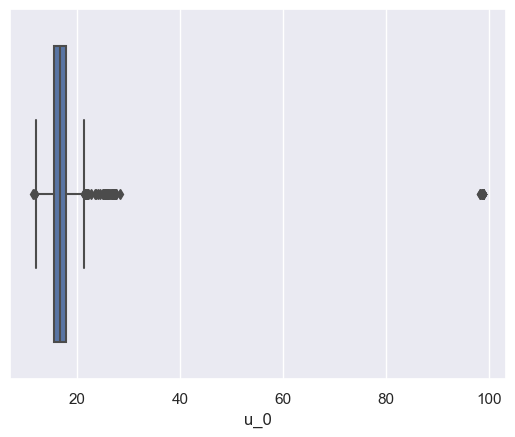

In [114]:
sns.boxplot(x = dataSet["u_0"])

<AxesSubplot: xlabel='J378_0'>

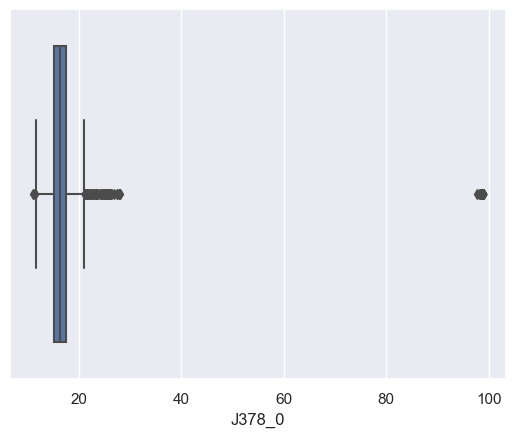

In [115]:
sns.boxplot(x = dataSet["J378_0"])

<AxesSubplot: xlabel='J395_0'>

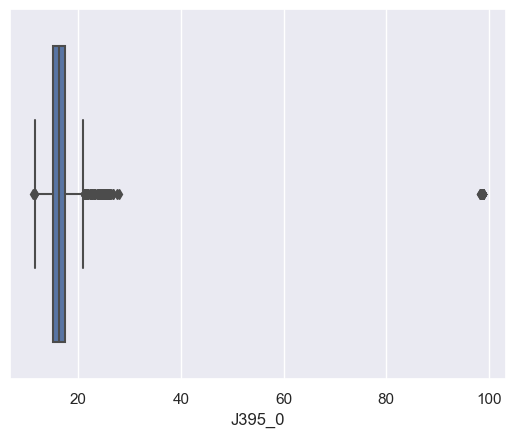

In [116]:
sns.boxplot(x = dataSet["J395_0"])

<AxesSubplot: xlabel='J410_0'>

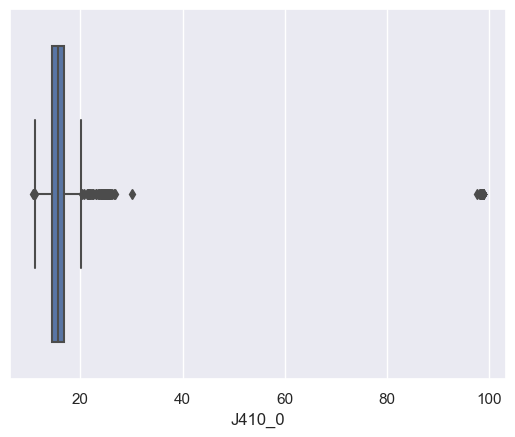

In [117]:
sns.boxplot(x = dataSet["J410_0"])

<AxesSubplot: xlabel='J430_0'>

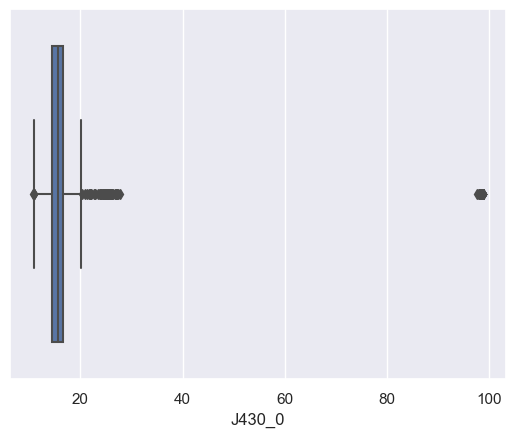

In [118]:
sns.boxplot(x = dataSet["J430_0"])

<AxesSubplot: xlabel='g_0'>

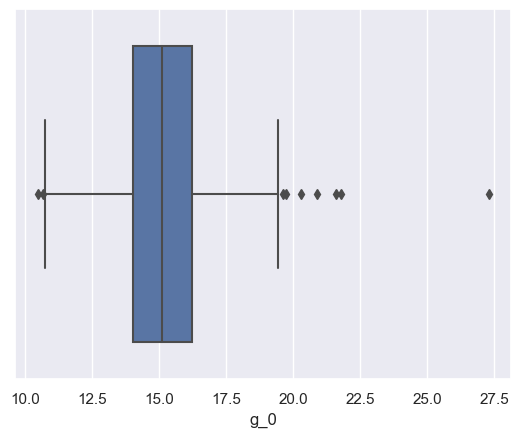

In [119]:
sns.boxplot(x = dataSet["g_0"])

<AxesSubplot: xlabel='J515_0'>

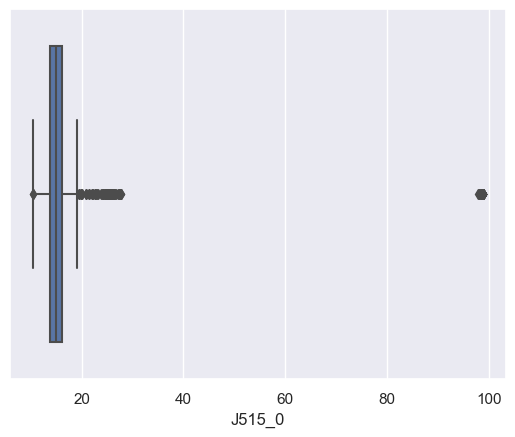

In [120]:
sns.boxplot(x = dataSet["J515_0"])

<AxesSubplot: xlabel='r_0'>

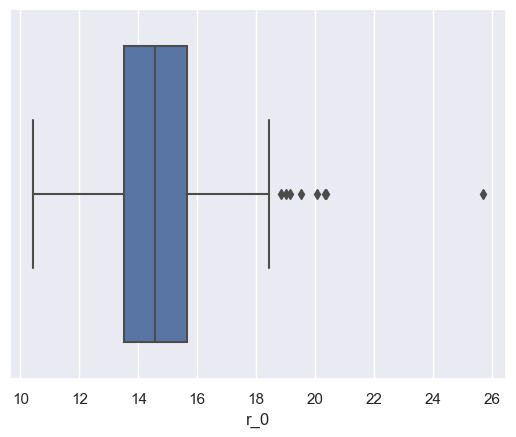

In [121]:
sns.boxplot(x = dataSet["r_0"])

<AxesSubplot: xlabel='J660_0'>

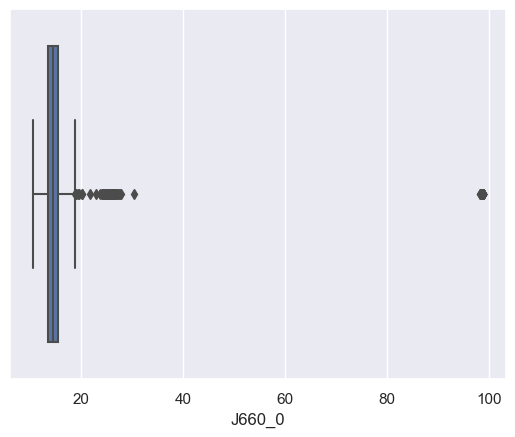

In [122]:
sns.boxplot(x = dataSet["J660_0"])

<AxesSubplot: xlabel='i_0'>

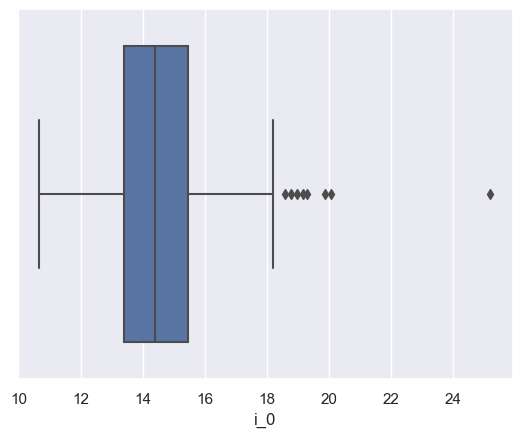

In [123]:
sns.boxplot(x = dataSet["i_0"])

<AxesSubplot: xlabel='J861_0'>

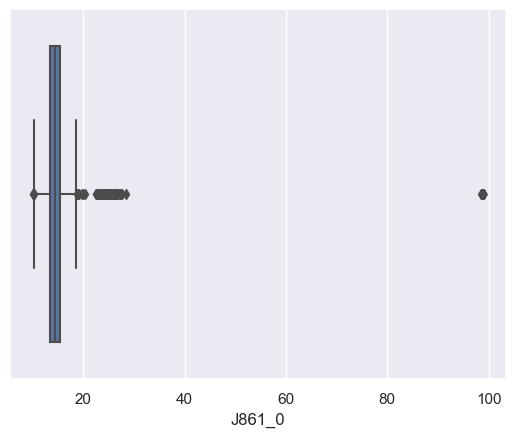

In [124]:
sns.boxplot(x = dataSet["J861_0"])

<AxesSubplot: xlabel='z_0'>

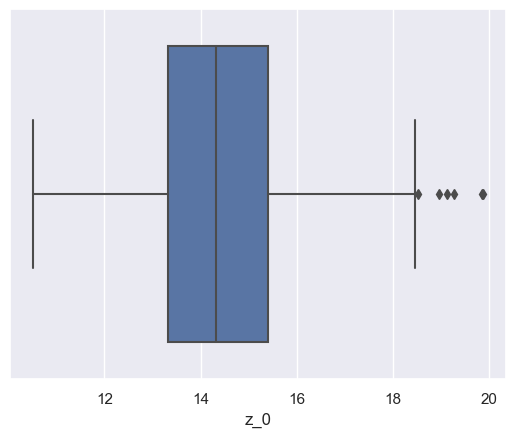

In [132]:
sns.boxplot(x = dataSet["z_0"])

<AxesSubplot: xlabel='logg_training'>

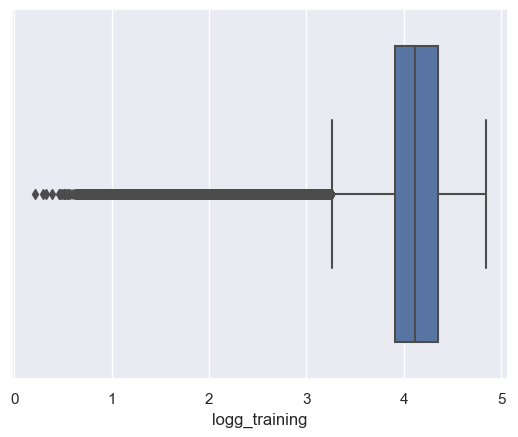

In [131]:
sns.boxplot(x = ydataSet["logg_training"])

In [130]:
ydataSet.max()

logg_training    4.84
dtype: float64

In [184]:
#sample_weights=generate_weights(np.array(Y_train),bins=20)#The 'sample_weights' and the 'train_y' should have the same shape.

ZeroDivisionError: division by zero

##### Treinando TEFF

In [35]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [36]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['teff_training']]

In [44]:
xtrain = csv[['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [45]:
ytrain = csv[['teff_training']]

In [46]:
xtrain.shape

(89660, 12)

In [8]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 12 stellar filters from splus; For example, it is an array with the shape of (189654,13);

train_y= encoder.encode_DataFrame(ytrain, 'teff_training')

In [10]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [11]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [13]:
bs = 3000

In [20]:
modelteff = baseline_model()

In [21]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modelteff.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
22/22 - 1s - loss: 0.1696 - val_loss: 0.1661 - 689ms/epoch - 31ms/step
Epoch 2/30
22/22 - 0s - loss: 0.1666 - val_loss: 0.1634 - 139ms/epoch - 6ms/step
Epoch 3/30
22/22 - 0s - loss: 0.1636 - val_loss: 0.1603 - 141ms/epoch - 6ms/step
Epoch 4/30
22/22 - 0s - loss: 0.1598 - val_loss: 0.1556 - 143ms/epoch - 6ms/step
Epoch 5/30
22/22 - 0s - loss: 0.1538 - val_loss: 0.1486 - 137ms/epoch - 6ms/step
Epoch 6/30
22/22 - 0s - loss: 0.1443 - val_loss: 0.1361 - 137ms/epoch - 6ms/step
Epoch 7/30
22/22 - 0s - loss: 0.1290 - val_loss: 0.1174 - 137ms/epoch - 6ms/step
Epoch 8/30
22/22 - 0s - loss: 0.1066 - val_loss: 0.0917 - 135ms/epoch - 6ms/step
Epoch 9/30
22/22 - 0s - loss: 0.0790 - val_loss: 0.0638 - 158ms/epoch - 7ms/step
Epoch 10/30
22/22 - 0s - loss: 0.0537 - val_loss: 0.0427 - 137ms/epoch - 6ms/step
Epoch 11/30
22/22 - 0s - loss: 0.0372 - val_loss: 0.0314 - 137ms/epoch - 6ms/step
Epoch 12/30
22/22 - 0s - loss: 0.0294 - val_loss: 0.0263 - 136ms/epoch - 6ms/step
Epoch 13/30
22/22 - 0s -

In [22]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyteff = modelteff.fit(X_train, Y_train, epochs = 2500, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#model.save('model/model_lamost__V.h5') 

Epoch 1/2500
22/22 - 0s - loss: 0.0183 - val_loss: 0.0181 - 167ms/epoch - 8ms/step
Epoch 2/2500
22/22 - 0s - loss: 0.0182 - val_loss: 0.0180 - 131ms/epoch - 6ms/step
Epoch 3/2500
22/22 - 0s - loss: 0.0181 - val_loss: 0.0180 - 129ms/epoch - 6ms/step
Epoch 4/2500
22/22 - 0s - loss: 0.0181 - val_loss: 0.0181 - 129ms/epoch - 6ms/step
Epoch 5/2500
22/22 - 0s - loss: 0.0180 - val_loss: 0.0178 - 124ms/epoch - 6ms/step
Epoch 6/2500
22/22 - 0s - loss: 0.0178 - val_loss: 0.0177 - 118ms/epoch - 5ms/step
Epoch 7/2500
22/22 - 0s - loss: 0.0178 - val_loss: 0.0176 - 117ms/epoch - 5ms/step
Epoch 8/2500
22/22 - 0s - loss: 0.0177 - val_loss: 0.0177 - 128ms/epoch - 6ms/step
Epoch 9/2500
22/22 - 0s - loss: 0.0176 - val_loss: 0.0176 - 120ms/epoch - 5ms/step
Epoch 10/2500
22/22 - 0s - loss: 0.0175 - val_loss: 0.0175 - 118ms/epoch - 5ms/step
Epoch 11/2500
22/22 - 0s - loss: 0.0175 - val_loss: 0.0174 - 127ms/epoch - 6ms/step
Epoch 12/2500
22/22 - 0s - loss: 0.0174 - val_loss: 0.0174 - 129ms/epoch - 6ms/step
E

Epoch 99/2500
22/22 - 0s - loss: 0.0149 - val_loss: 0.0149 - 123ms/epoch - 6ms/step
Epoch 100/2500
22/22 - 0s - loss: 0.0149 - val_loss: 0.0148 - 121ms/epoch - 6ms/step
Epoch 101/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0148 - 122ms/epoch - 6ms/step
Epoch 102/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0148 - 123ms/epoch - 6ms/step
Epoch 103/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0148 - 124ms/epoch - 6ms/step
Epoch 104/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0149 - 130ms/epoch - 6ms/step
Epoch 105/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0148 - 129ms/epoch - 6ms/step
Epoch 106/2500
22/22 - 0s - loss: 0.0147 - val_loss: 0.0148 - 122ms/epoch - 6ms/step
Epoch 107/2500
22/22 - 0s - loss: 0.0148 - val_loss: 0.0147 - 123ms/epoch - 6ms/step
Epoch 108/2500
22/22 - 0s - loss: 0.0147 - val_loss: 0.0147 - 129ms/epoch - 6ms/step
Epoch 109/2500
22/22 - 0s - loss: 0.0147 - val_loss: 0.0148 - 128ms/epoch - 6ms/step
Epoch 110/2500
22/22 - 0s - loss: 0.0147 - val_loss: 0.0149 - 126m

Epoch 196/2500
22/22 - 0s - loss: 0.0136 - val_loss: 0.0135 - 140ms/epoch - 6ms/step
Epoch 197/2500
22/22 - 0s - loss: 0.0135 - val_loss: 0.0135 - 152ms/epoch - 7ms/step
Epoch 198/2500
22/22 - 0s - loss: 0.0135 - val_loss: 0.0136 - 155ms/epoch - 7ms/step
Epoch 199/2500
22/22 - 0s - loss: 0.0135 - val_loss: 0.0137 - 147ms/epoch - 7ms/step
Epoch 200/2500
22/22 - 0s - loss: 0.0135 - val_loss: 0.0137 - 147ms/epoch - 7ms/step
Epoch 201/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0134 - 146ms/epoch - 7ms/step
Epoch 202/2500
22/22 - 0s - loss: 0.0135 - val_loss: 0.0134 - 143ms/epoch - 6ms/step
Epoch 203/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0135 - 148ms/epoch - 7ms/step
Epoch 204/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0135 - 144ms/epoch - 7ms/step
Epoch 205/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0134 - 147ms/epoch - 7ms/step
Epoch 206/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0134 - 142ms/epoch - 6ms/step
Epoch 207/2500
22/22 - 0s - loss: 0.0134 - val_loss: 0.0134 - 142

Epoch 293/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 133ms/epoch - 6ms/step
Epoch 294/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0128 - 131ms/epoch - 6ms/step
Epoch 295/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 184ms/epoch - 8ms/step
Epoch 296/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 136ms/epoch - 6ms/step
Epoch 297/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 135ms/epoch - 6ms/step
Epoch 298/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0127 - 135ms/epoch - 6ms/step
Epoch 299/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 173ms/epoch - 8ms/step
Epoch 300/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 133ms/epoch - 6ms/step
Epoch 301/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0126 - 138ms/epoch - 6ms/step
Epoch 302/2500
22/22 - 0s - loss: 0.0125 - val_loss: 0.0126 - 137ms/epoch - 6ms/step
Epoch 303/2500
22/22 - 0s - loss: 0.0126 - val_loss: 0.0130 - 137ms/epoch - 6ms/step
Epoch 304/2500
22/22 - 0s - loss: 0.0128 - val_loss: 0.0126 - 133

Epoch 390/2500
22/22 - 0s - loss: 0.0121 - val_loss: 0.0120 - 120ms/epoch - 5ms/step
Epoch 391/2500
22/22 - 0s - loss: 0.0119 - val_loss: 0.0120 - 118ms/epoch - 5ms/step
Epoch 392/2500
22/22 - 0s - loss: 0.0119 - val_loss: 0.0120 - 119ms/epoch - 5ms/step
Epoch 393/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0120 - 117ms/epoch - 5ms/step
Epoch 394/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0120 - 119ms/epoch - 5ms/step
Epoch 395/2500
22/22 - 0s - loss: 0.0119 - val_loss: 0.0120 - 118ms/epoch - 5ms/step
Epoch 396/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0119 - 120ms/epoch - 5ms/step
Epoch 397/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0119 - 120ms/epoch - 5ms/step
Epoch 398/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0119 - 118ms/epoch - 5ms/step
Epoch 399/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0120 - 118ms/epoch - 5ms/step
Epoch 400/2500
22/22 - 0s - loss: 0.0119 - val_loss: 0.0119 - 120ms/epoch - 5ms/step
Epoch 401/2500
22/22 - 0s - loss: 0.0118 - val_loss: 0.0119 - 121

Epoch 487/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0113 - 124ms/epoch - 6ms/step
Epoch 488/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0113 - 128ms/epoch - 6ms/step
Epoch 489/2500
22/22 - 0s - loss: 0.0111 - val_loss: 0.0114 - 138ms/epoch - 6ms/step
Epoch 490/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0113 - 125ms/epoch - 6ms/step
Epoch 491/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0112 - 126ms/epoch - 6ms/step
Epoch 492/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0113 - 123ms/epoch - 6ms/step
Epoch 493/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0112 - 123ms/epoch - 6ms/step
Epoch 494/2500
22/22 - 0s - loss: 0.0111 - val_loss: 0.0113 - 123ms/epoch - 6ms/step
Epoch 495/2500
22/22 - 0s - loss: 0.0111 - val_loss: 0.0112 - 124ms/epoch - 6ms/step
Epoch 496/2500
22/22 - 0s - loss: 0.0112 - val_loss: 0.0117 - 123ms/epoch - 6ms/step
Epoch 497/2500
22/22 - 0s - loss: 0.0111 - val_loss: 0.0112 - 125ms/epoch - 6ms/step
Epoch 498/2500
22/22 - 0s - loss: 0.0111 - val_loss: 0.0112 - 123

Epoch 584/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0106 - 132ms/epoch - 6ms/step
Epoch 585/2500
22/22 - 0s - loss: 0.0105 - val_loss: 0.0107 - 128ms/epoch - 6ms/step
Epoch 586/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0109 - 130ms/epoch - 6ms/step
Epoch 587/2500
22/22 - 0s - loss: 0.0105 - val_loss: 0.0106 - 131ms/epoch - 6ms/step
Epoch 588/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0108 - 131ms/epoch - 6ms/step
Epoch 589/2500
22/22 - 0s - loss: 0.0108 - val_loss: 0.0109 - 128ms/epoch - 6ms/step
Epoch 590/2500
22/22 - 0s - loss: 0.0105 - val_loss: 0.0106 - 128ms/epoch - 6ms/step
Epoch 591/2500
22/22 - 0s - loss: 0.0105 - val_loss: 0.0107 - 127ms/epoch - 6ms/step
Epoch 592/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0112 - 128ms/epoch - 6ms/step
Epoch 593/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0109 - 128ms/epoch - 6ms/step
Epoch 594/2500
22/22 - 0s - loss: 0.0106 - val_loss: 0.0106 - 129ms/epoch - 6ms/step
Epoch 595/2500
22/22 - 0s - loss: 0.0105 - val_loss: 0.0108 - 128

Epoch 681/2500
22/22 - 0s - loss: 0.0101 - val_loss: 0.0102 - 144ms/epoch - 7ms/step
Epoch 682/2500
22/22 - 0s - loss: 0.0101 - val_loss: 0.0103 - 132ms/epoch - 6ms/step
Epoch 683/2500
22/22 - 0s - loss: 0.0101 - val_loss: 0.0103 - 128ms/epoch - 6ms/step
Epoch 684/2500
22/22 - 0s - loss: 0.0100 - val_loss: 0.0103 - 130ms/epoch - 6ms/step
Epoch 685/2500
22/22 - 0s - loss: 0.0101 - val_loss: 0.0103 - 129ms/epoch - 6ms/step
Epoch 686/2500
22/22 - 0s - loss: 0.0103 - val_loss: 0.0109 - 132ms/epoch - 6ms/step
Epoch 687/2500
22/22 - 0s - loss: 0.0102 - val_loss: 0.0105 - 128ms/epoch - 6ms/step
Epoch 688/2500
22/22 - 0s - loss: 0.0101 - val_loss: 0.0108 - 131ms/epoch - 6ms/step
Epoch 689/2500
22/22 - 0s - loss: 0.0102 - val_loss: 0.0103 - 131ms/epoch - 6ms/step
Epoch 690/2500
22/22 - 0s - loss: 0.0100 - val_loss: 0.0102 - 130ms/epoch - 6ms/step
Epoch 691/2500
22/22 - 0s - loss: 0.0100 - val_loss: 0.0103 - 130ms/epoch - 6ms/step
Epoch 692/2500
22/22 - 0s - loss: 0.0100 - val_loss: 0.0102 - 127

Epoch 778/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0104 - 134ms/epoch - 6ms/step
Epoch 779/2500
22/22 - 0s - loss: 0.0099 - val_loss: 0.0100 - 133ms/epoch - 6ms/step
Epoch 780/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0105 - 122ms/epoch - 6ms/step
Epoch 781/2500
22/22 - 0s - loss: 0.0098 - val_loss: 0.0100 - 118ms/epoch - 5ms/step
Epoch 782/2500
22/22 - 0s - loss: 0.0098 - val_loss: 0.0100 - 118ms/epoch - 5ms/step
Epoch 783/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0099 - 118ms/epoch - 5ms/step
Epoch 784/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0099 - 123ms/epoch - 6ms/step
Epoch 785/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0101 - 118ms/epoch - 5ms/step
Epoch 786/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0099 - 121ms/epoch - 5ms/step
Epoch 787/2500
22/22 - 0s - loss: 0.0098 - val_loss: 0.0103 - 120ms/epoch - 5ms/step
Epoch 788/2500
22/22 - 0s - loss: 0.0100 - val_loss: 0.0101 - 123ms/epoch - 6ms/step
Epoch 789/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0101 - 121

Epoch 875/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0097 - 125ms/epoch - 6ms/step
Epoch 876/2500
22/22 - 0s - loss: 0.0095 - val_loss: 0.0097 - 132ms/epoch - 6ms/step
Epoch 877/2500
22/22 - 0s - loss: 0.0095 - val_loss: 0.0097 - 140ms/epoch - 6ms/step
Epoch 878/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0098 - 130ms/epoch - 6ms/step
Epoch 879/2500
22/22 - 0s - loss: 0.0095 - val_loss: 0.0099 - 129ms/epoch - 6ms/step
Epoch 880/2500
22/22 - 0s - loss: 0.0095 - val_loss: 0.0098 - 127ms/epoch - 6ms/step
Epoch 881/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0098 - 127ms/epoch - 6ms/step
Epoch 882/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0097 - 129ms/epoch - 6ms/step
Epoch 883/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0098 - 129ms/epoch - 6ms/step
Epoch 884/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0099 - 127ms/epoch - 6ms/step
Epoch 885/2500
22/22 - 0s - loss: 0.0096 - val_loss: 0.0102 - 126ms/epoch - 6ms/step
Epoch 886/2500
22/22 - 0s - loss: 0.0097 - val_loss: 0.0098 - 127

Epoch 972/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0095 - 142ms/epoch - 6ms/step
Epoch 973/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0095 - 135ms/epoch - 6ms/step
Epoch 974/2500
22/22 - 0s - loss: 0.0093 - val_loss: 0.0097 - 150ms/epoch - 7ms/step
Epoch 975/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0101 - 135ms/epoch - 6ms/step
Epoch 976/2500
22/22 - 0s - loss: 0.0094 - val_loss: 0.0096 - 139ms/epoch - 6ms/step
Epoch 977/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0094 - 136ms/epoch - 6ms/step
Epoch 978/2500
22/22 - 0s - loss: 0.0093 - val_loss: 0.0096 - 137ms/epoch - 6ms/step
Epoch 979/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0101 - 143ms/epoch - 7ms/step
Epoch 980/2500
22/22 - 0s - loss: 0.0093 - val_loss: 0.0094 - 144ms/epoch - 7ms/step
Epoch 981/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0094 - 135ms/epoch - 6ms/step
Epoch 982/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0094 - 139ms/epoch - 6ms/step
Epoch 983/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0095 - 137

Epoch 1068/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0099 - 142ms/epoch - 6ms/step
Epoch 1069/2500
22/22 - 0s - loss: 0.0092 - val_loss: 0.0093 - 134ms/epoch - 6ms/step
Epoch 1070/2500
22/22 - 0s - loss: 0.0091 - val_loss: 0.0094 - 122ms/epoch - 6ms/step
Epoch 1071/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0093 - 132ms/epoch - 6ms/step
Epoch 1072/2500
22/22 - 0s - loss: 0.0091 - val_loss: 0.0097 - 149ms/epoch - 7ms/step
Epoch 1073/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0093 - 145ms/epoch - 7ms/step
Epoch 1074/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0093 - 201ms/epoch - 9ms/step
Epoch 1075/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0093 - 140ms/epoch - 6ms/step
Epoch 1076/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0092 - 137ms/epoch - 6ms/step
Epoch 1077/2500
22/22 - 0s - loss: 0.0091 - val_loss: 0.0095 - 149ms/epoch - 7ms/step
Epoch 1078/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0092 - 146ms/epoch - 7ms/step
Epoch 1079/2500
22/22 - 0s - loss: 0.0090 - val_loss: 

Epoch 1164/2500
22/22 - 0s - loss: 0.0089 - val_loss: 0.0093 - 139ms/epoch - 6ms/step
Epoch 1165/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0091 - 142ms/epoch - 6ms/step
Epoch 1166/2500
22/22 - 0s - loss: 0.0089 - val_loss: 0.0091 - 134ms/epoch - 6ms/step
Epoch 1167/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0091 - 124ms/epoch - 6ms/step
Epoch 1168/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0091 - 126ms/epoch - 6ms/step
Epoch 1169/2500
22/22 - 0s - loss: 0.0091 - val_loss: 0.0095 - 131ms/epoch - 6ms/step
Epoch 1170/2500
22/22 - 0s - loss: 0.0089 - val_loss: 0.0092 - 141ms/epoch - 6ms/step
Epoch 1171/2500
22/22 - 0s - loss: 0.0089 - val_loss: 0.0093 - 124ms/epoch - 6ms/step
Epoch 1172/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0092 - 124ms/epoch - 6ms/step
Epoch 1173/2500
22/22 - 0s - loss: 0.0090 - val_loss: 0.0092 - 123ms/epoch - 6ms/step
Epoch 1174/2500
22/22 - 0s - loss: 0.0089 - val_loss: 0.0091 - 124ms/epoch - 6ms/step
Epoch 1175/2500
22/22 - 0s - loss: 0.0089 - val_loss: 

Epoch 1260/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0090 - 125ms/epoch - 6ms/step
Epoch 1261/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0091 - 138ms/epoch - 6ms/step
Epoch 1262/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0092 - 145ms/epoch - 7ms/step
Epoch 1263/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0090 - 139ms/epoch - 6ms/step
Epoch 1264/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0089 - 160ms/epoch - 7ms/step
Epoch 1265/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0089 - 140ms/epoch - 6ms/step
Epoch 1266/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0089 - 135ms/epoch - 6ms/step
Epoch 1267/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0091 - 140ms/epoch - 6ms/step
Epoch 1268/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0090 - 139ms/epoch - 6ms/step
Epoch 1269/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0092 - 143ms/epoch - 7ms/step
Epoch 1270/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0090 - 140ms/epoch - 6ms/step
Epoch 1271/2500
22/22 - 0s - loss: 0.0088 - val_loss: 

Epoch 1356/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0093 - 130ms/epoch - 6ms/step
Epoch 1357/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0092 - 115ms/epoch - 5ms/step
Epoch 1358/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0089 - 139ms/epoch - 6ms/step
Epoch 1359/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0088 - 118ms/epoch - 5ms/step
Epoch 1360/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0088 - 114ms/epoch - 5ms/step
Epoch 1361/2500
22/22 - 0s - loss: 0.0088 - val_loss: 0.0092 - 114ms/epoch - 5ms/step
Epoch 1362/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0090 - 121ms/epoch - 6ms/step
Epoch 1363/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0089 - 142ms/epoch - 6ms/step
Epoch 1364/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0090 - 120ms/epoch - 5ms/step
Epoch 1365/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0088 - 118ms/epoch - 5ms/step
Epoch 1366/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0090 - 119ms/epoch - 5ms/step
Epoch 1367/2500
22/22 - 0s - loss: 0.0086 - val_loss: 

Epoch 1452/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 140ms/epoch - 6ms/step
Epoch 1453/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0088 - 134ms/epoch - 6ms/step
Epoch 1454/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 134ms/epoch - 6ms/step
Epoch 1455/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0087 - 141ms/epoch - 6ms/step
Epoch 1456/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 111ms/epoch - 5ms/step
Epoch 1457/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0088 - 112ms/epoch - 5ms/step
Epoch 1458/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0089 - 110ms/epoch - 5ms/step
Epoch 1459/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 116ms/epoch - 5ms/step
Epoch 1460/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0086 - 112ms/epoch - 5ms/step
Epoch 1461/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 112ms/epoch - 5ms/step
Epoch 1462/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0087 - 124ms/epoch - 6ms/step
Epoch 1463/2500
22/22 - 0s - loss: 0.0086 - val_loss: 

Epoch 1548/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0086 - 123ms/epoch - 6ms/step
Epoch 1549/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0086 - 123ms/epoch - 6ms/step
Epoch 1550/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0088 - 127ms/epoch - 6ms/step
Epoch 1551/2500
22/22 - 0s - loss: 0.0086 - val_loss: 0.0087 - 121ms/epoch - 6ms/step
Epoch 1552/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0086 - 124ms/epoch - 6ms/step
Epoch 1553/2500
22/22 - 0s - loss: 0.0084 - val_loss: 0.0086 - 123ms/epoch - 6ms/step
Epoch 1554/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0088 - 127ms/epoch - 6ms/step
Epoch 1555/2500
22/22 - 0s - loss: 0.0087 - val_loss: 0.0088 - 126ms/epoch - 6ms/step
Epoch 1556/2500
22/22 - 0s - loss: 0.0084 - val_loss: 0.0085 - 124ms/epoch - 6ms/step
Epoch 1557/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0086 - 125ms/epoch - 6ms/step
Epoch 1558/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0086 - 124ms/epoch - 6ms/step
Epoch 1559/2500
22/22 - 0s - loss: 0.0083 - val_loss: 

Epoch 1644/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 125ms/epoch - 6ms/step
Epoch 1645/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0086 - 123ms/epoch - 6ms/step
Epoch 1646/2500
22/22 - 0s - loss: 0.0084 - val_loss: 0.0092 - 122ms/epoch - 6ms/step
Epoch 1647/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0087 - 126ms/epoch - 6ms/step
Epoch 1648/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0091 - 128ms/epoch - 6ms/step
Epoch 1649/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 122ms/epoch - 6ms/step
Epoch 1650/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0087 - 124ms/epoch - 6ms/step
Epoch 1651/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 121ms/epoch - 6ms/step
Epoch 1652/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0087 - 126ms/epoch - 6ms/step
Epoch 1653/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 143ms/epoch - 6ms/step
Epoch 1654/2500
22/22 - 0s - loss: 0.0085 - val_loss: 0.0085 - 145ms/epoch - 7ms/step
Epoch 1655/2500
22/22 - 0s - loss: 0.0084 - val_loss: 

Epoch 1740/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0087 - 139ms/epoch - 6ms/step
Epoch 1741/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0088 - 147ms/epoch - 7ms/step
Epoch 1742/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 139ms/epoch - 6ms/step
Epoch 1743/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0085 - 143ms/epoch - 6ms/step
Epoch 1744/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0085 - 137ms/epoch - 6ms/step
Epoch 1745/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 135ms/epoch - 6ms/step
Epoch 1746/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0084 - 140ms/epoch - 6ms/step
Epoch 1747/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0084 - 140ms/epoch - 6ms/step
Epoch 1748/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0088 - 140ms/epoch - 6ms/step
Epoch 1749/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0084 - 134ms/epoch - 6ms/step
Epoch 1750/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0087 - 137ms/epoch - 6ms/step
Epoch 1751/2500
22/22 - 0s - loss: 0.0083 - val_loss: 

Epoch 1836/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0088 - 140ms/epoch - 6ms/step
Epoch 1837/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0085 - 130ms/epoch - 6ms/step
Epoch 1838/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0083 - 154ms/epoch - 7ms/step
Epoch 1839/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0085 - 142ms/epoch - 6ms/step
Epoch 1840/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0083 - 134ms/epoch - 6ms/step
Epoch 1841/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0084 - 147ms/epoch - 7ms/step
Epoch 1842/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0088 - 155ms/epoch - 7ms/step
Epoch 1843/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0084 - 143ms/epoch - 6ms/step
Epoch 1844/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0083 - 123ms/epoch - 6ms/step
Epoch 1845/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0084 - 124ms/epoch - 6ms/step
Epoch 1846/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0083 - 137ms/epoch - 6ms/step
Epoch 1847/2500
22/22 - 0s - loss: 0.0084 - val_loss: 

Epoch 1932/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 124ms/epoch - 6ms/step
Epoch 1933/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0083 - 125ms/epoch - 6ms/step
Epoch 1934/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0085 - 129ms/epoch - 6ms/step
Epoch 1935/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0084 - 124ms/epoch - 6ms/step
Epoch 1936/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0083 - 128ms/epoch - 6ms/step
Epoch 1937/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0083 - 132ms/epoch - 6ms/step
Epoch 1938/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0088 - 130ms/epoch - 6ms/step
Epoch 1939/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0084 - 128ms/epoch - 6ms/step
Epoch 1940/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0090 - 127ms/epoch - 6ms/step
Epoch 1941/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0085 - 132ms/epoch - 6ms/step
Epoch 1942/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0084 - 136ms/epoch - 6ms/step
Epoch 1943/2500
22/22 - 0s - loss: 0.0080 - val_loss: 

Epoch 2028/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0082 - 127ms/epoch - 6ms/step
Epoch 2029/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0085 - 129ms/epoch - 6ms/step
Epoch 2030/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 129ms/epoch - 6ms/step
Epoch 2031/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0082 - 130ms/epoch - 6ms/step
Epoch 2032/2500
22/22 - 0s - loss: 0.0083 - val_loss: 0.0082 - 129ms/epoch - 6ms/step
Epoch 2033/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0082 - 132ms/epoch - 6ms/step
Epoch 2034/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 145ms/epoch - 7ms/step
Epoch 2035/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0087 - 150ms/epoch - 7ms/step
Epoch 2036/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 142ms/epoch - 6ms/step
Epoch 2037/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0083 - 140ms/epoch - 6ms/step
Epoch 2038/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 134ms/epoch - 6ms/step
Epoch 2039/2500
22/22 - 0s - loss: 0.0081 - val_loss: 

Epoch 2124/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0080 - 133ms/epoch - 6ms/step
Epoch 2125/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0080 - 131ms/epoch - 6ms/step
Epoch 2126/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 131ms/epoch - 6ms/step
Epoch 2127/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0082 - 134ms/epoch - 6ms/step
Epoch 2128/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 130ms/epoch - 6ms/step
Epoch 2129/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0084 - 129ms/epoch - 6ms/step
Epoch 2130/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 130ms/epoch - 6ms/step
Epoch 2131/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 131ms/epoch - 6ms/step
Epoch 2132/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0085 - 132ms/epoch - 6ms/step
Epoch 2133/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0084 - 133ms/epoch - 6ms/step
Epoch 2134/2500
22/22 - 0s - loss: 0.0082 - val_loss: 0.0085 - 134ms/epoch - 6ms/step
Epoch 2135/2500
22/22 - 0s - loss: 0.0079 - val_loss: 

Epoch 2220/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0080 - 132ms/epoch - 6ms/step
Epoch 2221/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0082 - 131ms/epoch - 6ms/step
Epoch 2222/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0082 - 133ms/epoch - 6ms/step
Epoch 2223/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0080 - 132ms/epoch - 6ms/step
Epoch 2224/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 131ms/epoch - 6ms/step
Epoch 2225/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0084 - 134ms/epoch - 6ms/step
Epoch 2226/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0080 - 119ms/epoch - 5ms/step
Epoch 2227/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0089 - 118ms/epoch - 5ms/step
Epoch 2228/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0080 - 118ms/epoch - 5ms/step
Epoch 2229/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 121ms/epoch - 6ms/step
Epoch 2230/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0082 - 119ms/epoch - 5ms/step
Epoch 2231/2500
22/22 - 0s - loss: 0.0080 - val_loss: 

Epoch 2316/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0084 - 173ms/epoch - 8ms/step
Epoch 2317/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 212ms/epoch - 10ms/step
Epoch 2318/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0080 - 143ms/epoch - 6ms/step
Epoch 2319/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0081 - 134ms/epoch - 6ms/step
Epoch 2320/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0082 - 123ms/epoch - 6ms/step
Epoch 2321/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0080 - 128ms/epoch - 6ms/step
Epoch 2322/2500
22/22 - 0s - loss: 0.0077 - val_loss: 0.0080 - 124ms/epoch - 6ms/step
Epoch 2323/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0081 - 122ms/epoch - 6ms/step
Epoch 2324/2500
22/22 - 0s - loss: 0.0080 - val_loss: 0.0081 - 122ms/epoch - 6ms/step
Epoch 2325/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0080 - 123ms/epoch - 6ms/step
Epoch 2326/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0083 - 129ms/epoch - 6ms/step
Epoch 2327/2500
22/22 - 0s - loss: 0.0079 - val_loss:

Epoch 2412/2500
22/22 - 0s - loss: 0.0077 - val_loss: 0.0080 - 127ms/epoch - 6ms/step
Epoch 2413/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0082 - 126ms/epoch - 6ms/step
Epoch 2414/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0080 - 126ms/epoch - 6ms/step
Epoch 2415/2500
22/22 - 0s - loss: 0.0081 - val_loss: 0.0080 - 130ms/epoch - 6ms/step
Epoch 2416/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0080 - 124ms/epoch - 6ms/step
Epoch 2417/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0082 - 127ms/epoch - 6ms/step
Epoch 2418/2500
22/22 - 0s - loss: 0.0077 - val_loss: 0.0079 - 125ms/epoch - 6ms/step
Epoch 2419/2500
22/22 - 0s - loss: 0.0077 - val_loss: 0.0081 - 127ms/epoch - 6ms/step
Epoch 2420/2500
22/22 - 0s - loss: 0.0077 - val_loss: 0.0083 - 126ms/epoch - 6ms/step
Epoch 2421/2500
22/22 - 0s - loss: 0.0078 - val_loss: 0.0083 - 127ms/epoch - 6ms/step
Epoch 2422/2500
22/22 - 0s - loss: 0.0079 - val_loss: 0.0083 - 127ms/epoch - 6ms/step
Epoch 2423/2500
22/22 - 0s - loss: 0.0078 - val_loss: 

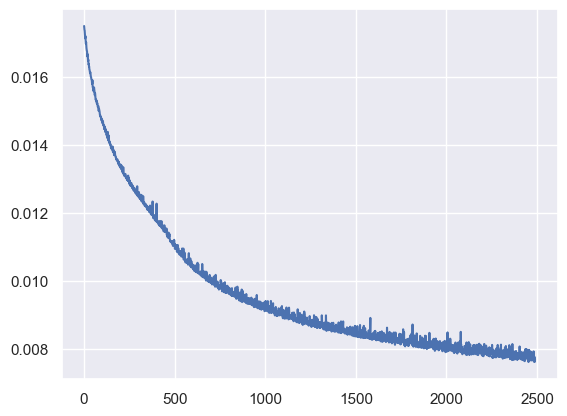

In [23]:
# plota as loss para ver se está treinando
plt.plot(historyteff.history['loss'][10:])

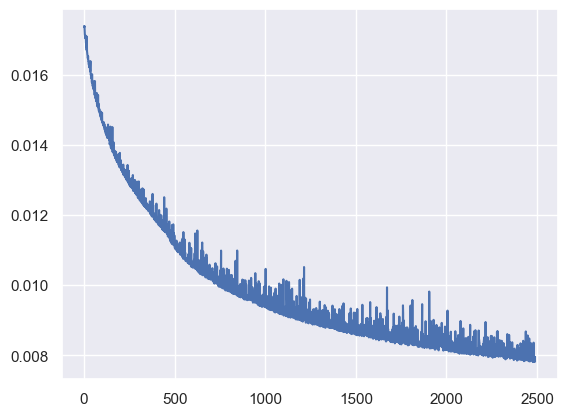

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyteff.history['val_loss'][10:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando LOGG

In [117]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [118]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['logg_training']]

In [47]:
xtrain = csv[['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [48]:
ytrain = csv[['logg_training']]

In [83]:
ytrain

,,,logg_training
ID,RA_SPLUS,DEC_SPLUS,
iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,4.27
iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,3.82
iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,3.81
iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,4.08
iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,4.49
...,...,...,...
iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,4.32
iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,4.21
iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,3.90


In [49]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

#train_y= encoder.encode_DataFrame(ytrain, 'logg_training')
train_y= ytrain

In [50]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [51]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [52]:
bs = 3000

In [72]:
modellogg = baseline_model()

In [73]:
# Rodar os primeiros testes para ignorar os maiores loss                                                  (sample_weight=sample_weights, )
modellogg.fit(X_train, Y_train, epochs = 30, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/30
22/22 - 1s - loss: 15.8892 - val_loss: 15.3051 - 1s/epoch - 49ms/step
Epoch 2/30
22/22 - 0s - loss: 14.7140 - val_loss: 13.7699 - 122ms/epoch - 6ms/step
Epoch 3/30
22/22 - 0s - loss: 12.5627 - val_loss: 10.7358 - 123ms/epoch - 6ms/step
Epoch 4/30
22/22 - 0s - loss: 8.6051 - val_loss: 5.7957 - 127ms/epoch - 6ms/step
Epoch 5/30
22/22 - 0s - loss: 3.4666 - val_loss: 1.2239 - 118ms/epoch - 5ms/step
Epoch 6/30
22/22 - 0s - loss: 0.6468 - val_loss: 0.4880 - 123ms/epoch - 6ms/step
Epoch 7/30
22/22 - 0s - loss: 0.4717 - val_loss: 0.4247 - 122ms/epoch - 6ms/step
Epoch 8/30
22/22 - 0s - loss: 0.4209 - val_loss: 0.4008 - 131ms/epoch - 6ms/step
Epoch 9/30
22/22 - 0s - loss: 0.4007 - val_loss: 0.3839 - 126ms/epoch - 6ms/step
Epoch 10/30
22/22 - 0s - loss: 0.3857 - val_loss: 0.3711 - 121ms/epoch - 6ms/step
Epoch 11/30
22/22 - 0s - loss: 0.3745 - val_loss: 0.3617 - 123ms/epoch - 6ms/step
Epoch 12/30
22/22 - 0s - loss: 0.3663 - val_loss: 0.3548 - 122ms/epoch - 6ms/step
Epoch 13/30
22/22 - 0

In [74]:
# Treinando e guardando o modelo                                                                                          (sample_weight=sample_weights, )
historylogg = modellogg.fit(X_train, Y_train, epochs = 3000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#model.save('model/model_lamost__V.h5') 

Epoch 1/3000
22/22 - 0s - loss: 0.3376 - val_loss: 0.3307 - 207ms/epoch - 9ms/step
Epoch 2/3000
22/22 - 0s - loss: 0.3364 - val_loss: 0.3296 - 145ms/epoch - 7ms/step
Epoch 3/3000
22/22 - 0s - loss: 0.3354 - val_loss: 0.3287 - 144ms/epoch - 7ms/step
Epoch 4/3000
22/22 - 0s - loss: 0.3342 - val_loss: 0.3276 - 138ms/epoch - 6ms/step
Epoch 5/3000
22/22 - 0s - loss: 0.3331 - val_loss: 0.3267 - 142ms/epoch - 6ms/step
Epoch 6/3000
22/22 - 0s - loss: 0.3321 - val_loss: 0.3259 - 143ms/epoch - 7ms/step
Epoch 7/3000
22/22 - 0s - loss: 0.3311 - val_loss: 0.3248 - 144ms/epoch - 7ms/step
Epoch 8/3000
22/22 - 0s - loss: 0.3300 - val_loss: 0.3239 - 140ms/epoch - 6ms/step
Epoch 9/3000
22/22 - 0s - loss: 0.3292 - val_loss: 0.3231 - 138ms/epoch - 6ms/step
Epoch 10/3000
22/22 - 0s - loss: 0.3283 - val_loss: 0.3223 - 145ms/epoch - 7ms/step
Epoch 11/3000
22/22 - 0s - loss: 0.3274 - val_loss: 0.3214 - 141ms/epoch - 6ms/step
Epoch 12/3000
22/22 - 0s - loss: 0.3266 - val_loss: 0.3207 - 143ms/epoch - 6ms/step
E

Epoch 99/3000
22/22 - 0s - loss: 0.3001 - val_loss: 0.2944 - 123ms/epoch - 6ms/step
Epoch 100/3000
22/22 - 0s - loss: 0.3002 - val_loss: 0.2944 - 119ms/epoch - 5ms/step
Epoch 101/3000
22/22 - 0s - loss: 0.3000 - val_loss: 0.2942 - 120ms/epoch - 5ms/step
Epoch 102/3000
22/22 - 0s - loss: 0.2998 - val_loss: 0.2944 - 121ms/epoch - 6ms/step
Epoch 103/3000
22/22 - 0s - loss: 0.2998 - val_loss: 0.2942 - 125ms/epoch - 6ms/step
Epoch 104/3000
22/22 - 0s - loss: 0.2998 - val_loss: 0.2939 - 124ms/epoch - 6ms/step
Epoch 105/3000
22/22 - 0s - loss: 0.2995 - val_loss: 0.2938 - 120ms/epoch - 5ms/step
Epoch 106/3000
22/22 - 0s - loss: 0.2994 - val_loss: 0.2937 - 121ms/epoch - 6ms/step
Epoch 107/3000
22/22 - 0s - loss: 0.2992 - val_loss: 0.2936 - 121ms/epoch - 6ms/step
Epoch 108/3000
22/22 - 0s - loss: 0.2991 - val_loss: 0.2935 - 122ms/epoch - 6ms/step
Epoch 109/3000
22/22 - 0s - loss: 0.2991 - val_loss: 0.2934 - 122ms/epoch - 6ms/step
Epoch 110/3000
22/22 - 0s - loss: 0.2989 - val_loss: 0.2934 - 127m

Epoch 196/3000
22/22 - 0s - loss: 0.2890 - val_loss: 0.2839 - 135ms/epoch - 6ms/step
Epoch 197/3000
22/22 - 0s - loss: 0.2885 - val_loss: 0.2839 - 136ms/epoch - 6ms/step
Epoch 198/3000
22/22 - 0s - loss: 0.2886 - val_loss: 0.2835 - 134ms/epoch - 6ms/step
Epoch 199/3000
22/22 - 0s - loss: 0.2883 - val_loss: 0.2835 - 134ms/epoch - 6ms/step
Epoch 200/3000
22/22 - 0s - loss: 0.2882 - val_loss: 0.2832 - 136ms/epoch - 6ms/step
Epoch 201/3000
22/22 - 0s - loss: 0.2879 - val_loss: 0.2830 - 138ms/epoch - 6ms/step
Epoch 202/3000
22/22 - 0s - loss: 0.2878 - val_loss: 0.2831 - 135ms/epoch - 6ms/step
Epoch 203/3000
22/22 - 0s - loss: 0.2877 - val_loss: 0.2829 - 137ms/epoch - 6ms/step
Epoch 204/3000
22/22 - 0s - loss: 0.2875 - val_loss: 0.2826 - 137ms/epoch - 6ms/step
Epoch 205/3000
22/22 - 0s - loss: 0.2872 - val_loss: 0.2827 - 140ms/epoch - 6ms/step
Epoch 206/3000
22/22 - 0s - loss: 0.2873 - val_loss: 0.2829 - 139ms/epoch - 6ms/step
Epoch 207/3000
22/22 - 0s - loss: 0.2871 - val_loss: 0.2823 - 162

Epoch 293/3000
22/22 - 0s - loss: 0.2786 - val_loss: 0.2754 - 140ms/epoch - 6ms/step
Epoch 294/3000
22/22 - 0s - loss: 0.2786 - val_loss: 0.2743 - 157ms/epoch - 7ms/step
Epoch 295/3000
22/22 - 0s - loss: 0.2783 - val_loss: 0.2746 - 140ms/epoch - 6ms/step
Epoch 296/3000
22/22 - 0s - loss: 0.2782 - val_loss: 0.2743 - 140ms/epoch - 6ms/step
Epoch 297/3000
22/22 - 0s - loss: 0.2780 - val_loss: 0.2745 - 139ms/epoch - 6ms/step
Epoch 298/3000
22/22 - 0s - loss: 0.2790 - val_loss: 0.2754 - 143ms/epoch - 7ms/step
Epoch 299/3000
22/22 - 0s - loss: 0.2787 - val_loss: 0.2760 - 140ms/epoch - 6ms/step
Epoch 300/3000
22/22 - 0s - loss: 0.2781 - val_loss: 0.2741 - 138ms/epoch - 6ms/step
Epoch 301/3000
22/22 - 0s - loss: 0.2779 - val_loss: 0.2740 - 134ms/epoch - 6ms/step
Epoch 302/3000
22/22 - 0s - loss: 0.2778 - val_loss: 0.2738 - 141ms/epoch - 6ms/step
Epoch 303/3000
22/22 - 0s - loss: 0.2776 - val_loss: 0.2739 - 142ms/epoch - 6ms/step
Epoch 304/3000
22/22 - 0s - loss: 0.2775 - val_loss: 0.2736 - 139

Epoch 390/3000
22/22 - 0s - loss: 0.2720 - val_loss: 0.2694 - 136ms/epoch - 6ms/step
Epoch 391/3000
22/22 - 0s - loss: 0.2717 - val_loss: 0.2682 - 119ms/epoch - 5ms/step
Epoch 392/3000
22/22 - 0s - loss: 0.2709 - val_loss: 0.2680 - 121ms/epoch - 6ms/step
Epoch 393/3000
22/22 - 0s - loss: 0.2709 - val_loss: 0.2681 - 123ms/epoch - 6ms/step
Epoch 394/3000
22/22 - 0s - loss: 0.2711 - val_loss: 0.2693 - 118ms/epoch - 5ms/step
Epoch 395/3000
22/22 - 0s - loss: 0.2712 - val_loss: 0.2676 - 121ms/epoch - 5ms/step
Epoch 396/3000
22/22 - 0s - loss: 0.2711 - val_loss: 0.2679 - 121ms/epoch - 5ms/step
Epoch 397/3000
22/22 - 0s - loss: 0.2707 - val_loss: 0.2676 - 121ms/epoch - 5ms/step
Epoch 398/3000
22/22 - 0s - loss: 0.2704 - val_loss: 0.2684 - 122ms/epoch - 6ms/step
Epoch 399/3000
22/22 - 0s - loss: 0.2704 - val_loss: 0.2676 - 130ms/epoch - 6ms/step
Epoch 400/3000
22/22 - 0s - loss: 0.2703 - val_loss: 0.2683 - 128ms/epoch - 6ms/step
Epoch 401/3000
22/22 - 0s - loss: 0.2705 - val_loss: 0.2673 - 130

Epoch 487/3000
22/22 - 0s - loss: 0.2621 - val_loss: 0.2602 - 141ms/epoch - 6ms/step
Epoch 488/3000
22/22 - 0s - loss: 0.2623 - val_loss: 0.2612 - 137ms/epoch - 6ms/step
Epoch 489/3000
22/22 - 0s - loss: 0.2624 - val_loss: 0.2595 - 136ms/epoch - 6ms/step
Epoch 490/3000
22/22 - 0s - loss: 0.2621 - val_loss: 0.2602 - 136ms/epoch - 6ms/step
Epoch 491/3000
22/22 - 0s - loss: 0.2619 - val_loss: 0.2601 - 136ms/epoch - 6ms/step
Epoch 492/3000
22/22 - 0s - loss: 0.2622 - val_loss: 0.2598 - 136ms/epoch - 6ms/step
Epoch 493/3000
22/22 - 0s - loss: 0.2617 - val_loss: 0.2594 - 140ms/epoch - 6ms/step
Epoch 494/3000
22/22 - 0s - loss: 0.2614 - val_loss: 0.2596 - 143ms/epoch - 7ms/step
Epoch 495/3000
22/22 - 0s - loss: 0.2623 - val_loss: 0.2589 - 138ms/epoch - 6ms/step
Epoch 496/3000
22/22 - 0s - loss: 0.2621 - val_loss: 0.2605 - 148ms/epoch - 7ms/step
Epoch 497/3000
22/22 - 0s - loss: 0.2623 - val_loss: 0.2627 - 168ms/epoch - 8ms/step
Epoch 498/3000
22/22 - 0s - loss: 0.2615 - val_loss: 0.2595 - 158

Epoch 584/3000
22/22 - 0s - loss: 0.2530 - val_loss: 0.2500 - 140ms/epoch - 6ms/step
Epoch 585/3000
22/22 - 0s - loss: 0.2521 - val_loss: 0.2498 - 140ms/epoch - 6ms/step
Epoch 586/3000
22/22 - 0s - loss: 0.2516 - val_loss: 0.2496 - 139ms/epoch - 6ms/step
Epoch 587/3000
22/22 - 0s - loss: 0.2514 - val_loss: 0.2500 - 139ms/epoch - 6ms/step
Epoch 588/3000
22/22 - 0s - loss: 0.2521 - val_loss: 0.2494 - 134ms/epoch - 6ms/step
Epoch 589/3000
22/22 - 0s - loss: 0.2513 - val_loss: 0.2492 - 138ms/epoch - 6ms/step
Epoch 590/3000
22/22 - 0s - loss: 0.2518 - val_loss: 0.2495 - 136ms/epoch - 6ms/step
Epoch 591/3000
22/22 - 0s - loss: 0.2512 - val_loss: 0.2539 - 138ms/epoch - 6ms/step
Epoch 592/3000
22/22 - 0s - loss: 0.2518 - val_loss: 0.2492 - 139ms/epoch - 6ms/step
Epoch 593/3000
22/22 - 0s - loss: 0.2520 - val_loss: 0.2491 - 139ms/epoch - 6ms/step
Epoch 594/3000
22/22 - 0s - loss: 0.2510 - val_loss: 0.2497 - 132ms/epoch - 6ms/step
Epoch 595/3000
22/22 - 0s - loss: 0.2515 - val_loss: 0.2511 - 136

Epoch 681/3000
22/22 - 0s - loss: 0.2420 - val_loss: 0.2394 - 120ms/epoch - 5ms/step
Epoch 682/3000
22/22 - 0s - loss: 0.2426 - val_loss: 0.2402 - 120ms/epoch - 5ms/step
Epoch 683/3000
22/22 - 0s - loss: 0.2419 - val_loss: 0.2395 - 120ms/epoch - 5ms/step
Epoch 684/3000
22/22 - 0s - loss: 0.2429 - val_loss: 0.2454 - 119ms/epoch - 5ms/step
Epoch 685/3000
22/22 - 0s - loss: 0.2422 - val_loss: 0.2390 - 119ms/epoch - 5ms/step
Epoch 686/3000
22/22 - 0s - loss: 0.2414 - val_loss: 0.2388 - 123ms/epoch - 6ms/step
Epoch 687/3000
22/22 - 0s - loss: 0.2420 - val_loss: 0.2384 - 122ms/epoch - 6ms/step
Epoch 688/3000
22/22 - 0s - loss: 0.2420 - val_loss: 0.2413 - 123ms/epoch - 6ms/step
Epoch 689/3000
22/22 - 0s - loss: 0.2412 - val_loss: 0.2389 - 127ms/epoch - 6ms/step
Epoch 690/3000
22/22 - 0s - loss: 0.2410 - val_loss: 0.2388 - 128ms/epoch - 6ms/step
Epoch 691/3000
22/22 - 0s - loss: 0.2417 - val_loss: 0.2395 - 122ms/epoch - 6ms/step
Epoch 692/3000
22/22 - 0s - loss: 0.2423 - val_loss: 0.2381 - 126

Epoch 778/3000
22/22 - 0s - loss: 0.2318 - val_loss: 0.2278 - 140ms/epoch - 6ms/step
Epoch 779/3000
22/22 - 0s - loss: 0.2320 - val_loss: 0.2282 - 137ms/epoch - 6ms/step
Epoch 780/3000
22/22 - 0s - loss: 0.2307 - val_loss: 0.2317 - 131ms/epoch - 6ms/step
Epoch 781/3000
22/22 - 0s - loss: 0.2316 - val_loss: 0.2279 - 137ms/epoch - 6ms/step
Epoch 782/3000
22/22 - 0s - loss: 0.2313 - val_loss: 0.2276 - 137ms/epoch - 6ms/step
Epoch 783/3000
22/22 - 0s - loss: 0.2308 - val_loss: 0.2321 - 137ms/epoch - 6ms/step
Epoch 784/3000
22/22 - 0s - loss: 0.2307 - val_loss: 0.2288 - 139ms/epoch - 6ms/step
Epoch 785/3000
22/22 - 0s - loss: 0.2304 - val_loss: 0.2268 - 139ms/epoch - 6ms/step
Epoch 786/3000
22/22 - 0s - loss: 0.2303 - val_loss: 0.2272 - 138ms/epoch - 6ms/step
Epoch 787/3000
22/22 - 0s - loss: 0.2302 - val_loss: 0.2289 - 139ms/epoch - 6ms/step
Epoch 788/3000
22/22 - 0s - loss: 0.2321 - val_loss: 0.2300 - 140ms/epoch - 6ms/step
Epoch 789/3000
22/22 - 0s - loss: 0.2312 - val_loss: 0.2282 - 155

Epoch 875/3000
22/22 - 0s - loss: 0.2208 - val_loss: 0.2173 - 140ms/epoch - 6ms/step
Epoch 876/3000
22/22 - 0s - loss: 0.2207 - val_loss: 0.2168 - 141ms/epoch - 6ms/step
Epoch 877/3000
22/22 - 0s - loss: 0.2208 - val_loss: 0.2285 - 142ms/epoch - 6ms/step
Epoch 878/3000
22/22 - 0s - loss: 0.2218 - val_loss: 0.2201 - 142ms/epoch - 6ms/step
Epoch 879/3000
22/22 - 0s - loss: 0.2215 - val_loss: 0.2174 - 141ms/epoch - 6ms/step
Epoch 880/3000
22/22 - 0s - loss: 0.2201 - val_loss: 0.2160 - 140ms/epoch - 6ms/step
Epoch 881/3000
22/22 - 0s - loss: 0.2201 - val_loss: 0.2160 - 136ms/epoch - 6ms/step
Epoch 882/3000
22/22 - 0s - loss: 0.2203 - val_loss: 0.2179 - 157ms/epoch - 7ms/step
Epoch 883/3000
22/22 - 0s - loss: 0.2211 - val_loss: 0.2157 - 138ms/epoch - 6ms/step
Epoch 884/3000
22/22 - 0s - loss: 0.2207 - val_loss: 0.2157 - 143ms/epoch - 7ms/step
Epoch 885/3000
22/22 - 0s - loss: 0.2204 - val_loss: 0.2189 - 143ms/epoch - 7ms/step
Epoch 886/3000
22/22 - 0s - loss: 0.2237 - val_loss: 0.2277 - 138

Epoch 972/3000
22/22 - 0s - loss: 0.2125 - val_loss: 0.2081 - 122ms/epoch - 6ms/step
Epoch 973/3000
22/22 - 0s - loss: 0.2136 - val_loss: 0.2081 - 120ms/epoch - 5ms/step
Epoch 974/3000
22/22 - 0s - loss: 0.2140 - val_loss: 0.2100 - 120ms/epoch - 5ms/step
Epoch 975/3000
22/22 - 0s - loss: 0.2137 - val_loss: 0.2086 - 123ms/epoch - 6ms/step
Epoch 976/3000
22/22 - 0s - loss: 0.2126 - val_loss: 0.2082 - 126ms/epoch - 6ms/step
Epoch 977/3000
22/22 - 0s - loss: 0.2125 - val_loss: 0.2067 - 122ms/epoch - 6ms/step
Epoch 978/3000
22/22 - 0s - loss: 0.2136 - val_loss: 0.2088 - 127ms/epoch - 6ms/step
Epoch 979/3000
22/22 - 0s - loss: 0.2124 - val_loss: 0.2070 - 130ms/epoch - 6ms/step
Epoch 980/3000
22/22 - 0s - loss: 0.2130 - val_loss: 0.2073 - 125ms/epoch - 6ms/step
Epoch 981/3000
22/22 - 0s - loss: 0.2112 - val_loss: 0.2068 - 128ms/epoch - 6ms/step
Epoch 982/3000
22/22 - 0s - loss: 0.2119 - val_loss: 0.2104 - 126ms/epoch - 6ms/step
Epoch 983/3000
22/22 - 0s - loss: 0.2133 - val_loss: 0.2067 - 127

Epoch 1068/3000
22/22 - 0s - loss: 0.2055 - val_loss: 0.1991 - 135ms/epoch - 6ms/step
Epoch 1069/3000
22/22 - 0s - loss: 0.2157 - val_loss: 0.2016 - 143ms/epoch - 7ms/step
Epoch 1070/3000
22/22 - 0s - loss: 0.2065 - val_loss: 0.2022 - 140ms/epoch - 6ms/step
Epoch 1071/3000
22/22 - 0s - loss: 0.2050 - val_loss: 0.1991 - 137ms/epoch - 6ms/step
Epoch 1072/3000
22/22 - 0s - loss: 0.2049 - val_loss: 0.2018 - 139ms/epoch - 6ms/step
Epoch 1073/3000
22/22 - 0s - loss: 0.2081 - val_loss: 0.2039 - 141ms/epoch - 6ms/step
Epoch 1074/3000
22/22 - 0s - loss: 0.2066 - val_loss: 0.1994 - 135ms/epoch - 6ms/step
Epoch 1075/3000
22/22 - 0s - loss: 0.2066 - val_loss: 0.2074 - 138ms/epoch - 6ms/step
Epoch 1076/3000
22/22 - 0s - loss: 0.2073 - val_loss: 0.2020 - 143ms/epoch - 6ms/step
Epoch 1077/3000
22/22 - 0s - loss: 0.2045 - val_loss: 0.2037 - 139ms/epoch - 6ms/step
Epoch 1078/3000
22/22 - 0s - loss: 0.2073 - val_loss: 0.2015 - 139ms/epoch - 6ms/step
Epoch 1079/3000
22/22 - 0s - loss: 0.2067 - val_loss: 

Epoch 1164/3000
22/22 - 0s - loss: 0.1996 - val_loss: 0.1944 - 169ms/epoch - 8ms/step
Epoch 1165/3000
22/22 - 0s - loss: 0.2004 - val_loss: 0.2014 - 142ms/epoch - 6ms/step
Epoch 1166/3000
22/22 - 0s - loss: 0.2022 - val_loss: 0.1927 - 138ms/epoch - 6ms/step
Epoch 1167/3000
22/22 - 0s - loss: 0.1984 - val_loss: 0.1940 - 135ms/epoch - 6ms/step
Epoch 1168/3000
22/22 - 0s - loss: 0.1987 - val_loss: 0.1928 - 137ms/epoch - 6ms/step
Epoch 1169/3000
22/22 - 0s - loss: 0.1982 - val_loss: 0.1932 - 136ms/epoch - 6ms/step
Epoch 1170/3000
22/22 - 0s - loss: 0.1981 - val_loss: 0.1925 - 135ms/epoch - 6ms/step
Epoch 1171/3000
22/22 - 0s - loss: 0.1982 - val_loss: 0.1925 - 140ms/epoch - 6ms/step
Epoch 1172/3000
22/22 - 0s - loss: 0.1975 - val_loss: 0.1912 - 134ms/epoch - 6ms/step
Epoch 1173/3000
22/22 - 0s - loss: 0.1973 - val_loss: 0.1917 - 137ms/epoch - 6ms/step
Epoch 1174/3000
22/22 - 0s - loss: 0.1973 - val_loss: 0.1917 - 133ms/epoch - 6ms/step
Epoch 1175/3000
22/22 - 0s - loss: 0.1970 - val_loss: 

Epoch 1260/3000
22/22 - 0s - loss: 0.1913 - val_loss: 0.1855 - 131ms/epoch - 6ms/step
Epoch 1261/3000
22/22 - 0s - loss: 0.1920 - val_loss: 0.1931 - 125ms/epoch - 6ms/step
Epoch 1262/3000
22/22 - 0s - loss: 0.1971 - val_loss: 0.1937 - 134ms/epoch - 6ms/step
Epoch 1263/3000
22/22 - 0s - loss: 0.1972 - val_loss: 0.1940 - 131ms/epoch - 6ms/step
Epoch 1264/3000
22/22 - 0s - loss: 0.2016 - val_loss: 0.1992 - 129ms/epoch - 6ms/step
Epoch 1265/3000
22/22 - 0s - loss: 0.1969 - val_loss: 0.1882 - 128ms/epoch - 6ms/step
Epoch 1266/3000
22/22 - 0s - loss: 0.1949 - val_loss: 0.1855 - 128ms/epoch - 6ms/step
Epoch 1267/3000
22/22 - 0s - loss: 0.1920 - val_loss: 0.1853 - 127ms/epoch - 6ms/step
Epoch 1268/3000
22/22 - 0s - loss: 0.1966 - val_loss: 0.1913 - 133ms/epoch - 6ms/step
Epoch 1269/3000
22/22 - 0s - loss: 0.1928 - val_loss: 0.1894 - 133ms/epoch - 6ms/step
Epoch 1270/3000
22/22 - 0s - loss: 0.1929 - val_loss: 0.1936 - 140ms/epoch - 6ms/step
Epoch 1271/3000
22/22 - 0s - loss: 0.1932 - val_loss: 

Epoch 1356/3000
22/22 - 0s - loss: 0.1867 - val_loss: 0.1813 - 142ms/epoch - 6ms/step
Epoch 1357/3000
22/22 - 0s - loss: 0.1918 - val_loss: 0.1966 - 138ms/epoch - 6ms/step
Epoch 1358/3000
22/22 - 0s - loss: 0.1929 - val_loss: 0.1819 - 141ms/epoch - 6ms/step
Epoch 1359/3000
22/22 - 0s - loss: 0.1889 - val_loss: 0.1793 - 141ms/epoch - 6ms/step
Epoch 1360/3000
22/22 - 0s - loss: 0.1895 - val_loss: 0.1786 - 138ms/epoch - 6ms/step
Epoch 1361/3000
22/22 - 0s - loss: 0.1861 - val_loss: 0.1798 - 140ms/epoch - 6ms/step
Epoch 1362/3000
22/22 - 0s - loss: 0.1850 - val_loss: 0.1872 - 141ms/epoch - 6ms/step
Epoch 1363/3000
22/22 - 0s - loss: 0.1879 - val_loss: 0.1817 - 145ms/epoch - 7ms/step
Epoch 1364/3000
22/22 - 0s - loss: 0.1864 - val_loss: 0.1866 - 142ms/epoch - 6ms/step
Epoch 1365/3000
22/22 - 0s - loss: 0.1859 - val_loss: 0.1782 - 140ms/epoch - 6ms/step
Epoch 1366/3000
22/22 - 0s - loss: 0.1843 - val_loss: 0.1777 - 142ms/epoch - 6ms/step
Epoch 1367/3000
22/22 - 0s - loss: 0.1836 - val_loss: 

Epoch 1452/3000
22/22 - 0s - loss: 0.1811 - val_loss: 0.1731 - 143ms/epoch - 7ms/step
Epoch 1453/3000
22/22 - 0s - loss: 0.1814 - val_loss: 0.1751 - 162ms/epoch - 7ms/step
Epoch 1454/3000
22/22 - 0s - loss: 0.1805 - val_loss: 0.1801 - 148ms/epoch - 7ms/step
Epoch 1455/3000
22/22 - 0s - loss: 0.1836 - val_loss: 0.1755 - 143ms/epoch - 6ms/step
Epoch 1456/3000
22/22 - 0s - loss: 0.1868 - val_loss: 0.1765 - 141ms/epoch - 6ms/step
Epoch 1457/3000
22/22 - 0s - loss: 0.1835 - val_loss: 0.1743 - 140ms/epoch - 6ms/step
Epoch 1458/3000
22/22 - 0s - loss: 0.1800 - val_loss: 0.1747 - 142ms/epoch - 6ms/step
Epoch 1459/3000
22/22 - 0s - loss: 0.1805 - val_loss: 0.1764 - 143ms/epoch - 6ms/step
Epoch 1460/3000
22/22 - 0s - loss: 0.1808 - val_loss: 0.1742 - 143ms/epoch - 6ms/step
Epoch 1461/3000
22/22 - 0s - loss: 0.1795 - val_loss: 0.1737 - 140ms/epoch - 6ms/step
Epoch 1462/3000
22/22 - 0s - loss: 0.1808 - val_loss: 0.1738 - 143ms/epoch - 6ms/step
Epoch 1463/3000
22/22 - 0s - loss: 0.1802 - val_loss: 

Epoch 1548/3000
22/22 - 0s - loss: 0.1752 - val_loss: 0.1693 - 128ms/epoch - 6ms/step
Epoch 1549/3000
22/22 - 0s - loss: 0.1769 - val_loss: 0.1773 - 121ms/epoch - 6ms/step
Epoch 1550/3000
22/22 - 0s - loss: 0.1783 - val_loss: 0.1690 - 123ms/epoch - 6ms/step
Epoch 1551/3000
22/22 - 0s - loss: 0.1755 - val_loss: 0.1785 - 120ms/epoch - 5ms/step
Epoch 1552/3000
22/22 - 0s - loss: 0.1762 - val_loss: 0.1771 - 121ms/epoch - 6ms/step
Epoch 1553/3000
22/22 - 0s - loss: 0.1756 - val_loss: 0.1744 - 122ms/epoch - 6ms/step
Epoch 1554/3000
22/22 - 0s - loss: 0.1811 - val_loss: 0.1723 - 123ms/epoch - 6ms/step
Epoch 1555/3000
22/22 - 0s - loss: 0.1787 - val_loss: 0.1685 - 127ms/epoch - 6ms/step
Epoch 1556/3000
22/22 - 0s - loss: 0.1756 - val_loss: 0.1702 - 131ms/epoch - 6ms/step
Epoch 1557/3000
22/22 - 0s - loss: 0.1745 - val_loss: 0.1720 - 129ms/epoch - 6ms/step
Epoch 1558/3000
22/22 - 0s - loss: 0.1757 - val_loss: 0.1703 - 130ms/epoch - 6ms/step
Epoch 1559/3000
22/22 - 0s - loss: 0.1735 - val_loss: 

Epoch 1644/3000
22/22 - 0s - loss: 0.1706 - val_loss: 0.1664 - 141ms/epoch - 6ms/step
Epoch 1645/3000
22/22 - 0s - loss: 0.1723 - val_loss: 0.1641 - 139ms/epoch - 6ms/step
Epoch 1646/3000
22/22 - 0s - loss: 0.1694 - val_loss: 0.1690 - 171ms/epoch - 8ms/step
Epoch 1647/3000
22/22 - 0s - loss: 0.1739 - val_loss: 0.1674 - 140ms/epoch - 6ms/step
Epoch 1648/3000
22/22 - 0s - loss: 0.1768 - val_loss: 0.1667 - 143ms/epoch - 7ms/step
Epoch 1649/3000
22/22 - 0s - loss: 0.1778 - val_loss: 0.1673 - 140ms/epoch - 6ms/step
Epoch 1650/3000
22/22 - 0s - loss: 0.1759 - val_loss: 0.1637 - 139ms/epoch - 6ms/step
Epoch 1651/3000
22/22 - 0s - loss: 0.1708 - val_loss: 0.1710 - 140ms/epoch - 6ms/step
Epoch 1652/3000
22/22 - 0s - loss: 0.1736 - val_loss: 0.1643 - 135ms/epoch - 6ms/step
Epoch 1653/3000
22/22 - 0s - loss: 0.1758 - val_loss: 0.1677 - 142ms/epoch - 6ms/step
Epoch 1654/3000
22/22 - 0s - loss: 0.1750 - val_loss: 0.1650 - 138ms/epoch - 6ms/step
Epoch 1655/3000
22/22 - 0s - loss: 0.1757 - val_loss: 

Epoch 1740/3000
22/22 - 0s - loss: 0.1699 - val_loss: 0.1614 - 141ms/epoch - 6ms/step
Epoch 1741/3000
22/22 - 0s - loss: 0.1654 - val_loss: 0.1717 - 141ms/epoch - 6ms/step
Epoch 1742/3000
22/22 - 0s - loss: 0.1667 - val_loss: 0.1599 - 140ms/epoch - 6ms/step
Epoch 1743/3000
22/22 - 0s - loss: 0.1670 - val_loss: 0.1660 - 139ms/epoch - 6ms/step
Epoch 1744/3000
22/22 - 0s - loss: 0.1678 - val_loss: 0.1604 - 138ms/epoch - 6ms/step
Epoch 1745/3000
22/22 - 0s - loss: 0.1653 - val_loss: 0.1605 - 137ms/epoch - 6ms/step
Epoch 1746/3000
22/22 - 0s - loss: 0.1745 - val_loss: 0.1742 - 133ms/epoch - 6ms/step
Epoch 1747/3000
22/22 - 0s - loss: 0.1784 - val_loss: 0.1667 - 139ms/epoch - 6ms/step
Epoch 1748/3000
22/22 - 0s - loss: 0.1784 - val_loss: 0.1599 - 136ms/epoch - 6ms/step
Epoch 1749/3000
22/22 - 0s - loss: 0.1692 - val_loss: 0.1603 - 138ms/epoch - 6ms/step
Epoch 1750/3000
22/22 - 0s - loss: 0.1672 - val_loss: 0.1647 - 139ms/epoch - 6ms/step
Epoch 1751/3000
22/22 - 0s - loss: 0.1665 - val_loss: 

Epoch 1836/3000
22/22 - 0s - loss: 0.1615 - val_loss: 0.1557 - 125ms/epoch - 6ms/step
Epoch 1837/3000
22/22 - 0s - loss: 0.1618 - val_loss: 0.1672 - 125ms/epoch - 6ms/step
Epoch 1838/3000
22/22 - 0s - loss: 0.1623 - val_loss: 0.1599 - 128ms/epoch - 6ms/step
Epoch 1839/3000
22/22 - 0s - loss: 0.1652 - val_loss: 0.1553 - 129ms/epoch - 6ms/step
Epoch 1840/3000
22/22 - 0s - loss: 0.1657 - val_loss: 0.1615 - 131ms/epoch - 6ms/step
Epoch 1841/3000
22/22 - 0s - loss: 0.1639 - val_loss: 0.1881 - 126ms/epoch - 6ms/step
Epoch 1842/3000
22/22 - 0s - loss: 0.1652 - val_loss: 0.1556 - 127ms/epoch - 6ms/step
Epoch 1843/3000
22/22 - 0s - loss: 0.1630 - val_loss: 0.1666 - 129ms/epoch - 6ms/step
Epoch 1844/3000
22/22 - 0s - loss: 0.1689 - val_loss: 0.1582 - 127ms/epoch - 6ms/step
Epoch 1845/3000
22/22 - 0s - loss: 0.1640 - val_loss: 0.1625 - 125ms/epoch - 6ms/step
Epoch 1846/3000
22/22 - 0s - loss: 0.1672 - val_loss: 0.1560 - 128ms/epoch - 6ms/step
Epoch 1847/3000
22/22 - 0s - loss: 0.1606 - val_loss: 

Epoch 1932/3000
22/22 - 0s - loss: 0.1575 - val_loss: 0.1528 - 133ms/epoch - 6ms/step
Epoch 1933/3000
22/22 - 0s - loss: 0.1587 - val_loss: 0.1545 - 135ms/epoch - 6ms/step
Epoch 1934/3000
22/22 - 0s - loss: 0.1630 - val_loss: 0.1537 - 136ms/epoch - 6ms/step
Epoch 1935/3000
22/22 - 0s - loss: 0.1635 - val_loss: 0.1520 - 136ms/epoch - 6ms/step
Epoch 1936/3000
22/22 - 0s - loss: 0.1582 - val_loss: 0.1687 - 140ms/epoch - 6ms/step
Epoch 1937/3000
22/22 - 0s - loss: 0.1623 - val_loss: 0.1547 - 137ms/epoch - 6ms/step
Epoch 1938/3000
22/22 - 0s - loss: 0.1640 - val_loss: 0.1544 - 138ms/epoch - 6ms/step
Epoch 1939/3000
22/22 - 0s - loss: 0.1713 - val_loss: 0.1529 - 138ms/epoch - 6ms/step
Epoch 1940/3000
22/22 - 0s - loss: 0.1605 - val_loss: 0.1603 - 138ms/epoch - 6ms/step
Epoch 1941/3000
22/22 - 0s - loss: 0.1621 - val_loss: 0.1686 - 145ms/epoch - 7ms/step
Epoch 1942/3000
22/22 - 0s - loss: 0.1611 - val_loss: 0.1562 - 141ms/epoch - 6ms/step
Epoch 1943/3000
22/22 - 0s - loss: 0.1739 - val_loss: 

Epoch 2028/3000
22/22 - 0s - loss: 0.1756 - val_loss: 0.1541 - 158ms/epoch - 7ms/step
Epoch 2029/3000
22/22 - 0s - loss: 0.1597 - val_loss: 0.1503 - 144ms/epoch - 7ms/step
Epoch 2030/3000
22/22 - 0s - loss: 0.1571 - val_loss: 0.1557 - 142ms/epoch - 6ms/step
Epoch 2031/3000
22/22 - 0s - loss: 0.1579 - val_loss: 0.1498 - 144ms/epoch - 7ms/step
Epoch 2032/3000
22/22 - 0s - loss: 0.1565 - val_loss: 0.1490 - 140ms/epoch - 6ms/step
Epoch 2033/3000
22/22 - 0s - loss: 0.1556 - val_loss: 0.1502 - 141ms/epoch - 6ms/step
Epoch 2034/3000
22/22 - 0s - loss: 0.1543 - val_loss: 0.1507 - 141ms/epoch - 6ms/step
Epoch 2035/3000
22/22 - 0s - loss: 0.1579 - val_loss: 0.1496 - 144ms/epoch - 7ms/step
Epoch 2036/3000
22/22 - 0s - loss: 0.1542 - val_loss: 0.1555 - 142ms/epoch - 6ms/step
Epoch 2037/3000
22/22 - 0s - loss: 0.1547 - val_loss: 0.1488 - 143ms/epoch - 7ms/step
Epoch 2038/3000
22/22 - 0s - loss: 0.1563 - val_loss: 0.1500 - 145ms/epoch - 7ms/step
Epoch 2039/3000
22/22 - 0s - loss: 0.1604 - val_loss: 

Epoch 2124/3000
22/22 - 0s - loss: 0.1555 - val_loss: 0.1470 - 129ms/epoch - 6ms/step
Epoch 2125/3000
22/22 - 0s - loss: 0.1518 - val_loss: 0.1462 - 129ms/epoch - 6ms/step
Epoch 2126/3000
22/22 - 0s - loss: 0.1543 - val_loss: 0.1565 - 128ms/epoch - 6ms/step
Epoch 2127/3000
22/22 - 0s - loss: 0.1536 - val_loss: 0.1471 - 127ms/epoch - 6ms/step
Epoch 2128/3000
22/22 - 0s - loss: 0.1527 - val_loss: 0.1545 - 131ms/epoch - 6ms/step
Epoch 2129/3000
22/22 - 0s - loss: 0.1572 - val_loss: 0.1556 - 131ms/epoch - 6ms/step
Epoch 2130/3000
22/22 - 0s - loss: 0.1525 - val_loss: 0.1518 - 131ms/epoch - 6ms/step
Epoch 2131/3000
22/22 - 0s - loss: 0.1539 - val_loss: 0.1492 - 133ms/epoch - 6ms/step
Epoch 2132/3000
22/22 - 0s - loss: 0.1523 - val_loss: 0.1577 - 136ms/epoch - 6ms/step
Epoch 2133/3000
22/22 - 0s - loss: 0.1532 - val_loss: 0.1489 - 132ms/epoch - 6ms/step
Epoch 2134/3000
22/22 - 0s - loss: 0.1515 - val_loss: 0.1500 - 130ms/epoch - 6ms/step
Epoch 2135/3000
22/22 - 0s - loss: 0.1557 - val_loss: 

Epoch 2220/3000
22/22 - 0s - loss: 0.1490 - val_loss: 0.1441 - 142ms/epoch - 6ms/step
Epoch 2221/3000
22/22 - 0s - loss: 0.1492 - val_loss: 0.1435 - 155ms/epoch - 7ms/step
Epoch 2222/3000
22/22 - 0s - loss: 0.1634 - val_loss: 0.1520 - 142ms/epoch - 6ms/step
Epoch 2223/3000
22/22 - 0s - loss: 0.1515 - val_loss: 0.1494 - 143ms/epoch - 7ms/step
Epoch 2224/3000
22/22 - 0s - loss: 0.1595 - val_loss: 0.1505 - 143ms/epoch - 6ms/step
Epoch 2225/3000
22/22 - 0s - loss: 0.1562 - val_loss: 0.1531 - 145ms/epoch - 7ms/step
Epoch 2226/3000
22/22 - 0s - loss: 0.1516 - val_loss: 0.1436 - 143ms/epoch - 7ms/step
Epoch 2227/3000
22/22 - 0s - loss: 0.1504 - val_loss: 0.1545 - 144ms/epoch - 7ms/step
Epoch 2228/3000
22/22 - 0s - loss: 0.2358 - val_loss: 0.1728 - 144ms/epoch - 7ms/step
Epoch 2229/3000
22/22 - 0s - loss: 0.1774 - val_loss: 0.1574 - 159ms/epoch - 7ms/step
Epoch 2230/3000
22/22 - 0s - loss: 0.1545 - val_loss: 0.1540 - 164ms/epoch - 7ms/step
Epoch 2231/3000
22/22 - 0s - loss: 0.1537 - val_loss: 

Epoch 2316/3000
22/22 - 0s - loss: 0.1487 - val_loss: 0.1661 - 141ms/epoch - 6ms/step
Epoch 2317/3000
22/22 - 0s - loss: 0.1521 - val_loss: 0.1450 - 138ms/epoch - 6ms/step
Epoch 2318/3000
22/22 - 0s - loss: 0.1503 - val_loss: 0.1544 - 137ms/epoch - 6ms/step
Epoch 2319/3000
22/22 - 0s - loss: 0.1499 - val_loss: 0.1555 - 140ms/epoch - 6ms/step
Epoch 2320/3000
22/22 - 0s - loss: 0.1555 - val_loss: 0.1515 - 139ms/epoch - 6ms/step
Epoch 2321/3000
22/22 - 0s - loss: 0.2474 - val_loss: 0.2121 - 135ms/epoch - 6ms/step
Epoch 2322/3000
22/22 - 0s - loss: 0.1838 - val_loss: 0.1580 - 135ms/epoch - 6ms/step
Epoch 2323/3000
22/22 - 0s - loss: 0.1544 - val_loss: 0.1467 - 137ms/epoch - 6ms/step
Epoch 2324/3000
22/22 - 0s - loss: 0.1500 - val_loss: 0.1463 - 140ms/epoch - 6ms/step
Epoch 2325/3000
22/22 - 0s - loss: 0.1510 - val_loss: 0.1435 - 137ms/epoch - 6ms/step
Epoch 2326/3000
22/22 - 0s - loss: 0.1575 - val_loss: 0.1544 - 138ms/epoch - 6ms/step
Epoch 2327/3000
22/22 - 0s - loss: 0.1708 - val_loss: 

Epoch 2412/3000
22/22 - 0s - loss: 0.1501 - val_loss: 0.1451 - 125ms/epoch - 6ms/step
Epoch 2413/3000
22/22 - 0s - loss: 0.1446 - val_loss: 0.1422 - 126ms/epoch - 6ms/step
Epoch 2414/3000
22/22 - 0s - loss: 0.1560 - val_loss: 0.1682 - 125ms/epoch - 6ms/step
Epoch 2415/3000
22/22 - 0s - loss: 0.1643 - val_loss: 0.2073 - 123ms/epoch - 6ms/step
Epoch 2416/3000
22/22 - 0s - loss: 0.1701 - val_loss: 0.1550 - 123ms/epoch - 6ms/step
Epoch 2417/3000
22/22 - 0s - loss: 0.1477 - val_loss: 0.1440 - 124ms/epoch - 6ms/step
Epoch 2418/3000
22/22 - 0s - loss: 0.1476 - val_loss: 0.1406 - 125ms/epoch - 6ms/step
Epoch 2419/3000
22/22 - 0s - loss: 0.1505 - val_loss: 0.1517 - 125ms/epoch - 6ms/step
Epoch 2420/3000
22/22 - 0s - loss: 0.1703 - val_loss: 0.1464 - 120ms/epoch - 5ms/step
Epoch 2421/3000
22/22 - 0s - loss: 0.1528 - val_loss: 0.1455 - 122ms/epoch - 6ms/step
Epoch 2422/3000
22/22 - 0s - loss: 0.1516 - val_loss: 0.1478 - 124ms/epoch - 6ms/step
Epoch 2423/3000
22/22 - 0s - loss: 0.1476 - val_loss: 

Epoch 2508/3000
22/22 - 0s - loss: 0.1436 - val_loss: 0.1402 - 138ms/epoch - 6ms/step
Epoch 2509/3000
22/22 - 0s - loss: 0.1455 - val_loss: 0.1457 - 136ms/epoch - 6ms/step
Epoch 2510/3000
22/22 - 0s - loss: 0.1462 - val_loss: 0.1396 - 138ms/epoch - 6ms/step
Epoch 2511/3000
22/22 - 0s - loss: 0.1426 - val_loss: 0.1405 - 135ms/epoch - 6ms/step
Epoch 2512/3000
22/22 - 0s - loss: 0.1443 - val_loss: 0.1405 - 140ms/epoch - 6ms/step
Epoch 2513/3000
22/22 - 0s - loss: 0.1515 - val_loss: 0.1537 - 138ms/epoch - 6ms/step
Epoch 2514/3000
22/22 - 0s - loss: 0.1466 - val_loss: 0.1454 - 136ms/epoch - 6ms/step
Epoch 2515/3000
22/22 - 0s - loss: 0.1501 - val_loss: 0.1427 - 139ms/epoch - 6ms/step
Epoch 2516/3000
22/22 - 0s - loss: 0.1452 - val_loss: 0.1387 - 139ms/epoch - 6ms/step
Epoch 2517/3000
22/22 - 0s - loss: 0.1431 - val_loss: 0.1426 - 140ms/epoch - 6ms/step
Epoch 2518/3000
22/22 - 0s - loss: 0.1455 - val_loss: 0.1386 - 140ms/epoch - 6ms/step
Epoch 2519/3000
22/22 - 0s - loss: 0.1553 - val_loss: 

Epoch 2604/3000
22/22 - 0s - loss: 0.1503 - val_loss: 0.1383 - 136ms/epoch - 6ms/step
Epoch 2605/3000
22/22 - 0s - loss: 0.1477 - val_loss: 0.1452 - 137ms/epoch - 6ms/step
Epoch 2606/3000
22/22 - 0s - loss: 0.1416 - val_loss: 0.1427 - 147ms/epoch - 7ms/step
Epoch 2607/3000
22/22 - 0s - loss: 0.1414 - val_loss: 0.1379 - 139ms/epoch - 6ms/step
Epoch 2608/3000
22/22 - 0s - loss: 0.1468 - val_loss: 0.1507 - 137ms/epoch - 6ms/step
Epoch 2609/3000
22/22 - 0s - loss: 0.1459 - val_loss: 0.1383 - 137ms/epoch - 6ms/step
Epoch 2610/3000
22/22 - 0s - loss: 0.1727 - val_loss: 0.1915 - 139ms/epoch - 6ms/step
Epoch 2611/3000
22/22 - 0s - loss: 0.2035 - val_loss: 0.1714 - 136ms/epoch - 6ms/step
Epoch 2612/3000
22/22 - 0s - loss: 0.1527 - val_loss: 0.1402 - 138ms/epoch - 6ms/step
Epoch 2613/3000
22/22 - 0s - loss: 0.1431 - val_loss: 0.1442 - 136ms/epoch - 6ms/step
Epoch 2614/3000
22/22 - 0s - loss: 0.1444 - val_loss: 0.1398 - 137ms/epoch - 6ms/step
Epoch 2615/3000
22/22 - 0s - loss: 0.1417 - val_loss: 

Epoch 2700/3000
22/22 - 0s - loss: 0.1560 - val_loss: 0.1470 - 124ms/epoch - 6ms/step
Epoch 2701/3000
22/22 - 0s - loss: 0.1571 - val_loss: 0.1575 - 127ms/epoch - 6ms/step
Epoch 2702/3000
22/22 - 0s - loss: 0.1574 - val_loss: 0.1535 - 126ms/epoch - 6ms/step
Epoch 2703/3000
22/22 - 0s - loss: 0.1562 - val_loss: 0.1483 - 123ms/epoch - 6ms/step
Epoch 2704/3000
22/22 - 0s - loss: 0.1510 - val_loss: 0.1487 - 128ms/epoch - 6ms/step
Epoch 2705/3000
22/22 - 0s - loss: 0.1531 - val_loss: 0.1472 - 123ms/epoch - 6ms/step
Epoch 2706/3000
22/22 - 0s - loss: 0.1509 - val_loss: 0.1532 - 123ms/epoch - 6ms/step
Epoch 2707/3000
22/22 - 0s - loss: 0.1547 - val_loss: 0.1467 - 123ms/epoch - 6ms/step
Epoch 2708/3000
22/22 - 0s - loss: 0.1518 - val_loss: 0.1466 - 123ms/epoch - 6ms/step
Epoch 2709/3000
22/22 - 0s - loss: 0.1520 - val_loss: 0.1480 - 122ms/epoch - 6ms/step
Epoch 2710/3000
22/22 - 0s - loss: 0.1515 - val_loss: 0.1464 - 121ms/epoch - 5ms/step
Epoch 2711/3000
22/22 - 0s - loss: 0.1507 - val_loss: 

Epoch 2796/3000
22/22 - 0s - loss: 0.1514 - val_loss: 0.1441 - 140ms/epoch - 6ms/step
Epoch 2797/3000
22/22 - 0s - loss: 0.1477 - val_loss: 0.1440 - 137ms/epoch - 6ms/step
Epoch 2798/3000
22/22 - 0s - loss: 0.1897 - val_loss: 0.1691 - 134ms/epoch - 6ms/step
Epoch 2799/3000
22/22 - 0s - loss: 0.1676 - val_loss: 0.2038 - 137ms/epoch - 6ms/step
Epoch 2800/3000
22/22 - 0s - loss: 0.2043 - val_loss: 0.1571 - 133ms/epoch - 6ms/step
Epoch 2801/3000
22/22 - 0s - loss: 0.1562 - val_loss: 0.1481 - 132ms/epoch - 6ms/step
Epoch 2802/3000
22/22 - 0s - loss: 0.1493 - val_loss: 0.1450 - 137ms/epoch - 6ms/step
Epoch 2803/3000
22/22 - 0s - loss: 0.1496 - val_loss: 0.1458 - 137ms/epoch - 6ms/step
Epoch 2804/3000
22/22 - 0s - loss: 0.1483 - val_loss: 0.1545 - 136ms/epoch - 6ms/step
Epoch 2805/3000
22/22 - 0s - loss: 0.1525 - val_loss: 0.1469 - 137ms/epoch - 6ms/step
Epoch 2806/3000
22/22 - 0s - loss: 0.1480 - val_loss: 0.1441 - 139ms/epoch - 6ms/step
Epoch 2807/3000
22/22 - 0s - loss: 0.1471 - val_loss: 

Epoch 2892/3000
22/22 - 0s - loss: 0.1441 - val_loss: 0.1411 - 139ms/epoch - 6ms/step
Epoch 2893/3000
22/22 - 0s - loss: 0.1464 - val_loss: 0.1417 - 138ms/epoch - 6ms/step
Epoch 2894/3000
22/22 - 0s - loss: 0.1497 - val_loss: 0.1427 - 142ms/epoch - 6ms/step
Epoch 2895/3000
22/22 - 0s - loss: 0.1495 - val_loss: 0.1478 - 140ms/epoch - 6ms/step
Epoch 2896/3000
22/22 - 0s - loss: 0.1485 - val_loss: 0.1439 - 143ms/epoch - 6ms/step
Epoch 2897/3000
22/22 - 0s - loss: 0.1456 - val_loss: 0.1427 - 140ms/epoch - 6ms/step
Epoch 2898/3000
22/22 - 0s - loss: 0.1501 - val_loss: 0.1432 - 141ms/epoch - 6ms/step
Epoch 2899/3000
22/22 - 0s - loss: 0.1617 - val_loss: 0.2725 - 146ms/epoch - 7ms/step
Epoch 2900/3000
22/22 - 0s - loss: 0.2282 - val_loss: 0.1611 - 145ms/epoch - 7ms/step
Epoch 2901/3000
22/22 - 0s - loss: 0.1756 - val_loss: 0.1480 - 145ms/epoch - 7ms/step
Epoch 2902/3000
22/22 - 0s - loss: 0.1501 - val_loss: 0.1458 - 142ms/epoch - 6ms/step
Epoch 2903/3000
22/22 - 0s - loss: 0.1478 - val_loss: 

Epoch 2988/3000
22/22 - 0s - loss: 0.1487 - val_loss: 0.1449 - 135ms/epoch - 6ms/step
Epoch 2989/3000
22/22 - 0s - loss: 0.1449 - val_loss: 0.1389 - 124ms/epoch - 6ms/step
Epoch 2990/3000
22/22 - 0s - loss: 0.1444 - val_loss: 0.1396 - 126ms/epoch - 6ms/step
Epoch 2991/3000
22/22 - 0s - loss: 0.1429 - val_loss: 0.1496 - 127ms/epoch - 6ms/step
Epoch 2992/3000
22/22 - 0s - loss: 0.1462 - val_loss: 0.1482 - 121ms/epoch - 6ms/step
Epoch 2993/3000
22/22 - 0s - loss: 0.1457 - val_loss: 0.1393 - 123ms/epoch - 6ms/step
Epoch 2994/3000
22/22 - 0s - loss: 0.1468 - val_loss: 0.1434 - 122ms/epoch - 6ms/step
Epoch 2995/3000
22/22 - 0s - loss: 0.1450 - val_loss: 0.1390 - 124ms/epoch - 6ms/step
Epoch 2996/3000
22/22 - 0s - loss: 0.1433 - val_loss: 0.1410 - 123ms/epoch - 6ms/step
Epoch 2997/3000
22/22 - 0s - loss: 0.1487 - val_loss: 0.1425 - 123ms/epoch - 6ms/step
Epoch 2998/3000
22/22 - 0s - loss: 0.1445 - val_loss: 0.1470 - 129ms/epoch - 6ms/step
Epoch 2999/3000
22/22 - 0s - loss: 0.1463 - val_loss: 

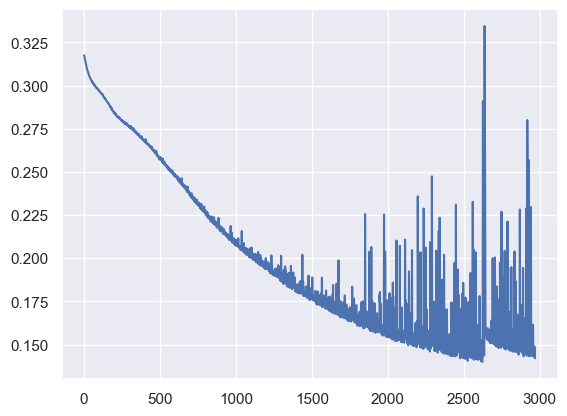

In [75]:
# plota as loss para ver se está treinando
plt.plot(historylogg.history['loss'][30:])

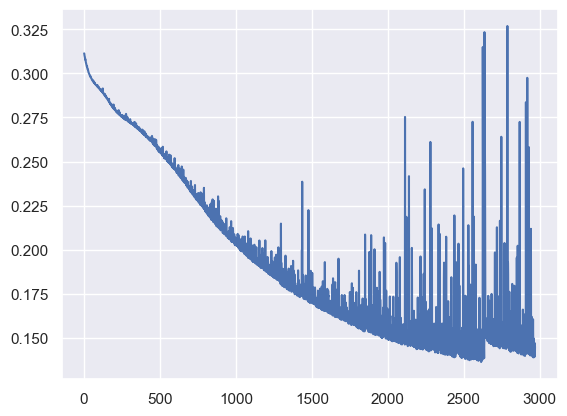

In [76]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historylogg.history['val_loss'][30:]) #dar smoothie nas curvas kkkkkk para colocar no paper

##### Treinando FEH

In [ ]:
xtrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['u_0', 'J378_0', 'J395_0', 
                 'J410_0', 'J430_0', 'g_0', 
                 'J515_0', 'r_0', 'J660_0', 
                 'i_0', 'J861_0', 'z_0']]

In [ ]:
ytrain = csv.loc[(csv['SNRg_LAMOST']>10) & 
                 (csv['SNRi_LAMOST']>10) & 
                 (csv['SNRz_LAMOST']>10) & 
                 (csv['SNRr_LAMOST']>10) & 
                 (csv['teff_LAMOST']>4000) & 
                 (csv['teff_LAMOST']<7000),
                 ['feh_training']]

In [ ]:
train_x= encoder.encode_DataFrame(xtrain, "lamost")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y= ytrain

In [ ]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [ ]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [ ]:
bs = 512

In [ ]:
modelfeh = baseline_model()

In [21]:
# Rodar os primeiros testes para ignorar os maiores loss                                              (sample_weight=sample_weights, )
modelfeh.fit(X_train, Y_train, epochs = 10, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/10
74/74 - 1s - loss: 0.1396 - val_loss: 0.1356 - 709ms/epoch - 10ms/step
Epoch 2/10
74/74 - 0s - loss: 0.1326 - val_loss: 0.1258 - 379ms/epoch - 5ms/step
Epoch 3/10
74/74 - 0s - loss: 0.1129 - val_loss: 0.0923 - 299ms/epoch - 4ms/step
Epoch 4/10
74/74 - 0s - loss: 0.0678 - val_loss: 0.0418 - 303ms/epoch - 4ms/step
Epoch 5/10
74/74 - 0s - loss: 0.0305 - val_loss: 0.0228 - 288ms/epoch - 4ms/step
Epoch 6/10
74/74 - 0s - loss: 0.0225 - val_loss: 0.0209 - 303ms/epoch - 4ms/step
Epoch 7/10
74/74 - 0s - loss: 0.0211 - val_loss: 0.0198 - 287ms/epoch - 4ms/step
Epoch 8/10
74/74 - 0s - loss: 0.0205 - val_loss: 0.0195 - 304ms/epoch - 4ms/step
Epoch 9/10
74/74 - 0s - loss: 0.0199 - val_loss: 0.0198 - 430ms/epoch - 6ms/step
Epoch 10/10
74/74 - 0s - loss: 0.0195 - val_loss: 0.0189 - 303ms/epoch - 4ms/step


In [ ]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyfeh = modelfeh.fit(X_train, Y_train, epochs = 1000, validation_data=(X_val, Y_val), batch_size = bs, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

# Salva o modelo treinado.
#model.save('model/model_lamost__V.h5')

In [ ]:
# plota as loss para ver se está treinando
plt.plot(historyfeh.history['loss'])

In [ ]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyfeh.history['val_loss'][40:]) #dar smoothie nas curvas kkkkkk para colocar no paper

# Testando modelos treinados

##### teff

In [25]:
predteff = modelteff.predict(X_test)

561/561 [==============================] - 1s 1ms/step


Text(0, 0.5, 'Y_test')

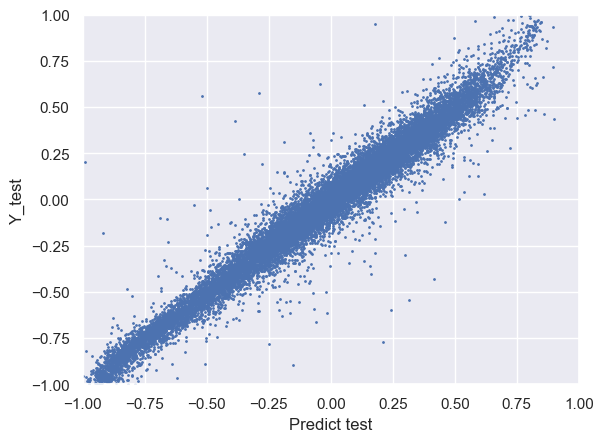

In [26]:
# plota o pred de acordo com o Y_test (teff)
plt.scatter(predteff, Y_test, s=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [27]:
score = r2_score(Y_test, predteff)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 96.0%


In [28]:
score = mean_absolute_error(Y_test, predteff)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.05


In [29]:
score = np.sqrt(mean_absolute_error(Y_test, predteff))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.23


##### logg

In [77]:
predlogg = modellogg.predict(X_test)

561/561 [==============================] - 1s 2ms/step


In [78]:
#encoder.decode_DataFrame(predologg, "logg_training")

Text(0, 0.5, 'Y_test')

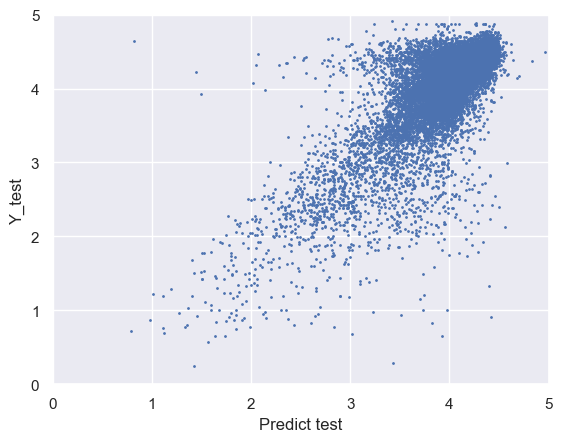

In [79]:
# plota o pred de acordo com o Y_test (logg)
plt.scatter(predlogg, Y_test, s=1)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [80]:
score = r2_score(Y_test, predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 55.00000000000001%


In [81]:
score = mean_absolute_error(Y_test, predlogg)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.24


In [69]:
score = np.sqrt(mean_absolute_error(Y_test, predlogg))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.49


##### feh

In [ ]:
predfeh = modelteff.predict(X_test)

Text(0, 0.5, 'Y_test')

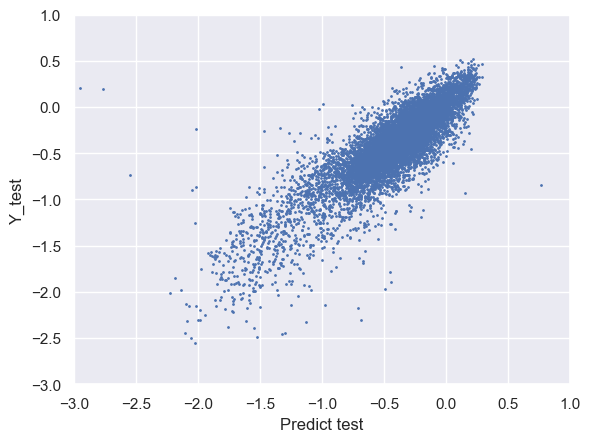

In [172]:
# plota o pred de acordo com o Y_test (feh)
plt.scatter(predfeh, Y_test, s=1)
plt.xlim(-3, 1)
plt.ylim(-3, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [ ]:
score = r2_score(Y_test, predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

In [ ]:
score = mean_absolute_error(Y_test, predfeh)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

In [ ]:
score = np.sqrt(mean_absolute_error(Y_test, predfeh))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

In [39]:
for i in range(len(pred)):
    print(f'{pred[i]} - {np.array(Y_test)[i]}')

[-0.01653169] - [0.10436812]
[-0.0164127] - [0.12504168]
[-0.01655977] - [0.16505502]
[-0.01605693] - [-0.26775592]
[-0.01719073] - [-0.31977326]
[-0.01660319] - [-0.79393131]
[-0.01743995] - [-0.20306769]
[-0.01610001] - [-0.30576859]
[-0.01593579] - [-0.3957986]
[-0.01600106] - [-0.53117706]
[-0.01713799] - [0.31177059]
[-0.01663167] - [0.46115372]
[-0.01659522] - [-0.11103701]
[-0.0163922] - [0.10370123]
[-0.0168667] - [-0.48849617]
[-0.01728272] - [-0.07835945]
[-0.01648687] - [0.23107703]
[-0.01596602] - [-0.75125042]
[-0.01706299] - [0.20906969]
[-0.01727004] - [-0.01767256]
[-0.01663666] - [0.31843948]
[-0.01672502] - [0.28309436]
[-0.0164045] - [-0.17039013]
[-0.01630088] - [0.00033344]
[-0.0166153] - [0.56585529]
[-0.01672463] - [0.1357119]
[-0.01670246] - [-0.78459486]
[-0.01689277] - [0.02167389]
[-0.0165698] - [0.28442814]
[-0.01643093] - [-0.20306769]
[-0.01682014] - [-0.8246082]
[-0.01709703] - [0.04234745]
[-0.0168339] - [0.32710904]
[-0.01652981] - [-0.7705902]
[-0.0164

[-0.01645855] - [0.03567856]
[-0.01649794] - [0.18972991]
[-0.01685493] - [0.12304101]
[-0.01700574] - [0.24708236]
[-0.01723836] - [-0.31243748]
[-0.01828946] - [0.53251084]
[-0.01629045] - [-0.39846616]
[-0.01658951] - [0.21707236]
[-0.01602059] - [-0.4624875]
[-0.01655132] - [0.25775258]
[-0.01618243] - [-0.15771924]
[-0.01646179] - [0.08636212]
[-0.01750152] - [-0.08969657]
[-0.01642973] - [-0.01833945]
[-0.01669034] - [0.18772924]
[-0.01789594] - [-0.26375458]
[-0.01674598] - [0.06102034]
[-0.01679963] - [-0.51583861]
[-0.01728839] - [0.41513838]
[-0.01662131] - [0.20973658]
[-0.01640589] - [-0.00566856]
[-0.01756053] - [0.05968656]
[-0.01771483] - [0.34844948]
[-0.01611613] - [-0.22507503]
[-0.01791413] - [0.66255418]
[-0.01892938] - [0.42980994]
[-0.01657025] - [0.02634211]
[-0.01639197] - [-0.13104368]
[-0.01689706] - [-0.43381127]
[-0.01724554] - [0.18506169]
[-0.01667199] - [0.4924975]
[-0.01639934] - [0.12904301]
[-0.01781918] - [0.31843948]
[-0.01787825] - [-0.03834612]
[-0

[-0.01660512] - [-0.25241747]
[-0.01780531] - [-0.35578526]
[-0.01755435] - [0.4804935]
[-0.01630076] - [-0.11970657]
[-0.01791588] - [0.03701234]
[-0.01654501] - [0.35378459]
[-0.01627827] - [-0.33844615]
[-0.01582661] - [-0.4198066]
[-0.01558513] - [-0.64788263]
[-0.01683811] - [0.0816939]
[-0.0160722] - [-0.34178059]
[-0.01789093] - [0.10770257]
[-0.01637072] - [0.11103701]
[-0.01641654] - [0.08236079]
[-0.01700184] - [0.38179393]
[-0.01746067] - [0.41513838]
[-0.01672799] - [-0.6132044]
[-0.01668143] - [0.24708236]
[-0.01728919] - [-0.66988996]
[-0.01694541] - [-0.42714238]
[-0.01651344] - [0.06768923]
[-0.01635009] - [0.03367789]
[-0.01700936] - [0.15505168]
[-0.01690149] - [-0.06502167]
[-0.01764742] - [0.9153051]
[-0.01638438] - [0.15305102]
[-0.01612722] - [-0.25908636]
[-0.01629251] - [-0.06835612]
[-0.01763986] - [0.23974658]
[-0.01795583] - [0.23441147]
[-0.01658437] - [0.32444148]
[-0.01662675] - [0.3717906]
[-0.01724274] - [0.31377126]
[-0.01634398] - [0.03101034]
[-0.0154

[-0.0165527] - [0.25508503]
[-0.01696367] - [0.04234745]
[-0.01831838] - [-0.25241747]
[-0.0164253] - [0.13304435]
[-0.0164202] - [-0.01167056]
[-0.01663055] - [0.1723908]
[-0.01652448] - [0.07502501]
[-0.01660411] - [0.30376792]
[-0.01754193] - [0.45848616]
[-0.01693603] - [-0.4804935]
[-0.01601666] - [-0.32510837]
[-0.01775426] - [0.15038346]
[-0.01649719] - [0.24108036]
[-0.01745045] - [0.18106035]
[-0.01644963] - [0.18172724]
[-0.01605029] - [-0.22840947]
[-0.01649569] - [0.03701234]
[-0.01613047] - [-0.39646549]
[-0.01628291] - [-0.05035012]
[-0.01778159] - [0.29509837]
[-0.01752906] - [-0.06235412]
[-0.01643795] - [0.01633878]
[-0.01665209] - [0.0936979]
[-0.0163798] - [-0.61787262]
[-0.0168028] - [0.34044682]
[-0.01718529] - [-0.21507169]
[-0.01632306] - [0.01233745]
[-0.01714397] - [0.35711904]
[-0.01779806] - [-0.39046349]
[-0.01644585] - [0.0576859]
[-0.01587528] - [-0.67522508]
[-0.01641118] - [0.07835945]
[-0.01774746] - [0.10370123]
[-0.01639793] - [-0.09436479]
[-0.016382

[-0.01653562] - [0.16105368]
[-0.01684469] - [0.02834278]
[-0.01609569] - [-0.31043681]
[-0.01656495] - [0.20373458]
[-0.01605884] - [-0.36445482]
[-0.01709988] - [0.19773258]
[-0.01666368] - [0.27042347]
[-0.01775464] - [0.51583861]
[-0.01719751] - [-0.62454151]
[-0.01651961] - [0.35378459]
[-0.01633592] - [-0.11437146]
[-0.01633728] - [-0.12770924]
[-0.01643472] - [0.17572524]
[-0.01731284] - [-0.36112037]
[-0.01734452] - [0.03101034]
[-0.01789354] - [-0.69523174]
[-0.01728237] - [0.76525509]
[-0.01631436] - [-0.75591864]
[-0.01643317] - [-0.2384128]
[-0.01754528] - [0.17172391]
[-0.01655378] - [0.16905635]
[-0.01830481] - [0.51317106]
[-0.01637268] - [-0.04301434]
[-0.01775841] - [0.39513171]
[-0.01768951] - [0.12637546]
[-0.01673838] - [0.14904968]
[-0.01682598] - [-0.16972324]
[-0.0175162] - [0.10103368]
[-0.01679049] - [-0.34844948]
[-0.0174406] - [0.15171724]
[-0.01636565] - [-0.10236746]
[-0.0168672] - [0.47315772]
[-0.01625465] - [-0.12170724]
[-0.01651735] - [0.08969657]
[-0.

[-0.01770855] - [-0.45115038]
[-0.01603478] - [-0.48849617]
[-0.01711386] - [0.28242748]
[-0.01711472] - [0.06835612]
[-0.01720216] - [-0.19906636]
[-0.01695013] - [0.03234411]
[-0.01697752] - [0.01033678]
[-0.01614857] - [-0.23774592]
[-0.01694431] - [-0.14104702]
[-0.01623188] - [-0.1963988]
[-0.01670451] - [0.36245415]
[-0.01642333] - [0.08569523]
[-0.01712086] - [-0.77192397]
[-0.01656627] - [0.10770257]
[-0.01789467] - [-0.37045682]
[-0.01705125] - [0.37845949]
[-0.01760638] - [-0.49716572]
[-0.01720372] - [0.37912638]
[-0.01639787] - [-0.32977659]
[-0.01677344] - [-0.65855285]
[-0.01542979] - [-0.83327776]
[-0.01647913] - [0.06635545]
[-0.01687739] - [0.45515172]
[-0.01683156] - [-0.32510837]
[-0.0180788] - [-0.02834278]
[-0.01771458] - [0.16105368]
[-0.01602149] - [-0.27575859]
[-0.01733322] - [0.36045348]
[-0.01677316] - [0.15305102]
[-0.01687529] - [-0.68856285]
[-0.01599811] - [-0.45515172]
[-0.01658414] - [0.03034345]
[-0.01603158] - [-0.01967322]
[-0.01650591] - [0.28176059

[-0.01755303] - [0.22840947]
[-0.01632137] - [-0.09636546]
[-0.01694937] - [0.25175058]
[-0.01795583] - [-0.11570524]
[-0.01640976] - [0.09836612]
[-0.01635421] - [0.05568523]
[-0.01701529] - [0.08836279]
[-0.01642936] - [-0.01167056]
[-0.01645054] - [0.05835278]
[-0.01765026] - [-0.46982327]
[-0.017203] - [0.52584195]
[-0.01667711] - [-0.33844615]
[-0.01634713] - [-0.03767923]
[-0.01629433] - [-0.8732911]
[-0.0165433] - [0.28976325]
[-0.01752366] - [0.24841614]
[-0.01682671] - [0.17772591]
[-0.01746516] - [0.35178393]
[-0.01528125] - [-0.88329443]
[-0.01641044] - [0.21240413]
[-0.01657732] - [-0.34178059]
[-0.01690208] - [0.00966989]
[-0.01662407] - [0.4198066]
[-0.01705695] - [-0.34978326]
[-0.01640954] - [-0.02767589]
[-0.01684946] - [0.53384461]
[-0.01636179] - [-0.04368123]
[-0.01718896] - [-0.14304768]
[-0.01706508] - [-0.3231077]
[-0.0166405] - [0.41313771]
[-0.01681572] - [0.22507503]
[-0.01756062] - [0.40513505]
[-0.01668863] - [0.58786262]
[-0.01726097] - [0.25575192]
[-0.017

In [174]:
a = []
f = 0
for i in range(len(pred)):
    a.append(pred[i] - np.array(Y_test)[i])
    f += int(pred[i] - np.array(Y_test)[i])

In [175]:
f/len(pred)

-0.0017262875227774049

In [176]:
a = np.array(a)

In [177]:
print(f'MAX: {a.max()}')
print(f'MIN: {a.min()}')
print(f'MEAN: {a.mean()}')

MAX: 1.6103280067443846
MIN: -17.713723373413085
MEAN: -0.020520809442062127


In [50]:
score = r2_score(Y_test, pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [52]:
score = mean_absolute_error(Y_test, pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.06


In [67]:
score = np.sqrt(mean_absolute_error(Y_test, pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))


The Mean Absolute Error of our Model is 0.24


In [64]:
x = scaler.inverse_transform(pred)

In [65]:
y = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'Y_test')

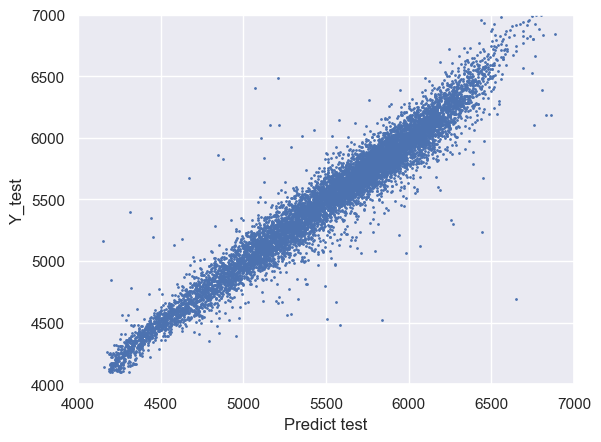

In [66]:
# plota o pred de acordo com o Y_test (teff) removendo a normalização
plt.scatter(x, y, s=1)
plt.xlim(4000, 7000)
plt.ylim(4000, 7000)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

# Aplicando rede treinada

In [185]:
csv2 = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])

In [186]:
csv2

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.016197,0.013491,0.011681,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.007420,0.006743,0.006265,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.006913,0.007903,0.007426,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.045775,0.022941,0.014659,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.009739,0.007266,0.006659,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,1.106783,0.489786,0.377637,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.931720,1.855599,1.005176,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.296826,0.328811,0.276437,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926


In [187]:
ndf = csv2[['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [188]:
ndf.shape

(2187, 12)

In [189]:
aply_x = ndf.to_numpy()

In [190]:
#scaler = MinMaxScaler(feature_range = (-1,1))

In [192]:
aply_n= scaler.fit_transform(aply_x)

In [229]:
#when applying the model to your data (eg., jplus dr1), please run the following code.
#model=load_model('model/model_lamost_teff_V2_Final.h5')
result=model.predict(aply_n)

69/69 [==============================] - 0s 2ms/step


In [230]:
result

array([[-0.32188916],
       [ 0.46823418],
       [ 0.52766514],
       ...,
       [-0.08489259],
       [-0.21540591],
       [ 0.16249362]], dtype=float32)

In [231]:
x = scaler.inverse_transform(result)

In [232]:
x

array([[5065.827 ],
       [6250.617 ],
       [6339.734 ],
       ...,
       [5421.2036],
       [5225.499 ],
       [5792.159 ]], dtype=float32)

In [197]:
#csv3 = csv2

In [235]:
csv3['teff_predict'] = x

In [236]:
csv3

,,,Field,FWHM,ISOarea,KRON_RADIUS,MU_MAX,nDet_PStotal,PhotoFlagDet,CLASS_STAR,u_PStotal,J0378_PStotal,...,e_g_PStotal,e_J0515_PStotal,e_r_PStotal,e_J0660_PStotal,e_i_PStotal,e_J0861_PStotal,e_z_PStotal,feh_predict,logg_predict,teff_predict
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,b'SPLUS-n14s03 ',2.162409,525,2.547039,10.630968,12.0,0,0.985563,16.675000,16.575087,...,0.003638,0.006543,0.001912,0.001706,0.001566,0.002259,0.001615,-0.058913,3.635599,5065.827148
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,b'HYDRA-0077 ',2.060758,271,2.745416,12.111699,12.0,0,0.974406,15.377505,15.103262,...,0.003002,0.005050,0.002588,0.002551,0.002657,0.004397,0.003160,-0.059050,3.595240,6250.617188
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,b'SPLUS-s23s45 ',2.044366,246,2.879416,11.472648,12.0,0,0.994988,15.014418,15.013782,...,0.003380,0.006805,0.002777,0.002718,0.002879,0.005049,0.003880,-0.057255,3.681078,6339.733887
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,b'SPLUS-n18s18 ',2.552651,252,2.627111,10.996559,12.0,0,0.972722,19.206873,18.916110,...,0.004242,0.007772,0.002779,0.002490,0.002253,0.002922,0.001966,0.207014,3.488342,5085.914062
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,b'HYDRA-0049 ',3.168911,395,3.058134,11.737776,12.0,0,0.871400,16.499258,16.071520,...,0.002987,0.006106,0.002627,0.003007,0.003147,0.003607,0.002895,0.050466,3.624842,6131.705566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.SPLUS-n03s18.004879 ',174.344407,-3.312593,b'SPLUS-n03s18 ',5.641993,15,6.179567,17.176810,12.0,2,0.564282,21.547806,21.304468,...,0.108107,0.332114,0.074605,0.043763,0.142963,0.140397,0.141498,0.737091,3.661139,5282.076660
b'iDR3.STRIPE82-0125.029072',327.127535,-0.797904,b'STRIPE82-0125',2.090127,7,1.820000,16.853830,12.0,0,0.549148,21.961760,21.633818,...,0.215671,0.395559,0.109843,0.055459,0.116920,0.180835,0.204769,0.745572,3.606813,5205.132812
b'iDR3.STRIPE82-0132.057659',331.015699,1.107458,b'STRIPE82-0132',3.068043,10,5.251886,17.315880,12.0,2,0.609140,21.442451,22.669330,...,0.119231,0.308578,0.085324,0.045233,0.163681,0.149418,0.400926,0.871691,3.857249,5421.203613


In [237]:
csv3.to_csv("Halpha_Final.csv")